# Uczenie głębokie - sieci neuronowe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
import nltk

2023-08-26 22:45:19.004237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 22:45:20.487894: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-26 22:45:20.487955: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-26 22:45:24.540002: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukanie parametru $w$, dla którego funkcja $J(w)$ przyjmuje najmniejszą wartość.
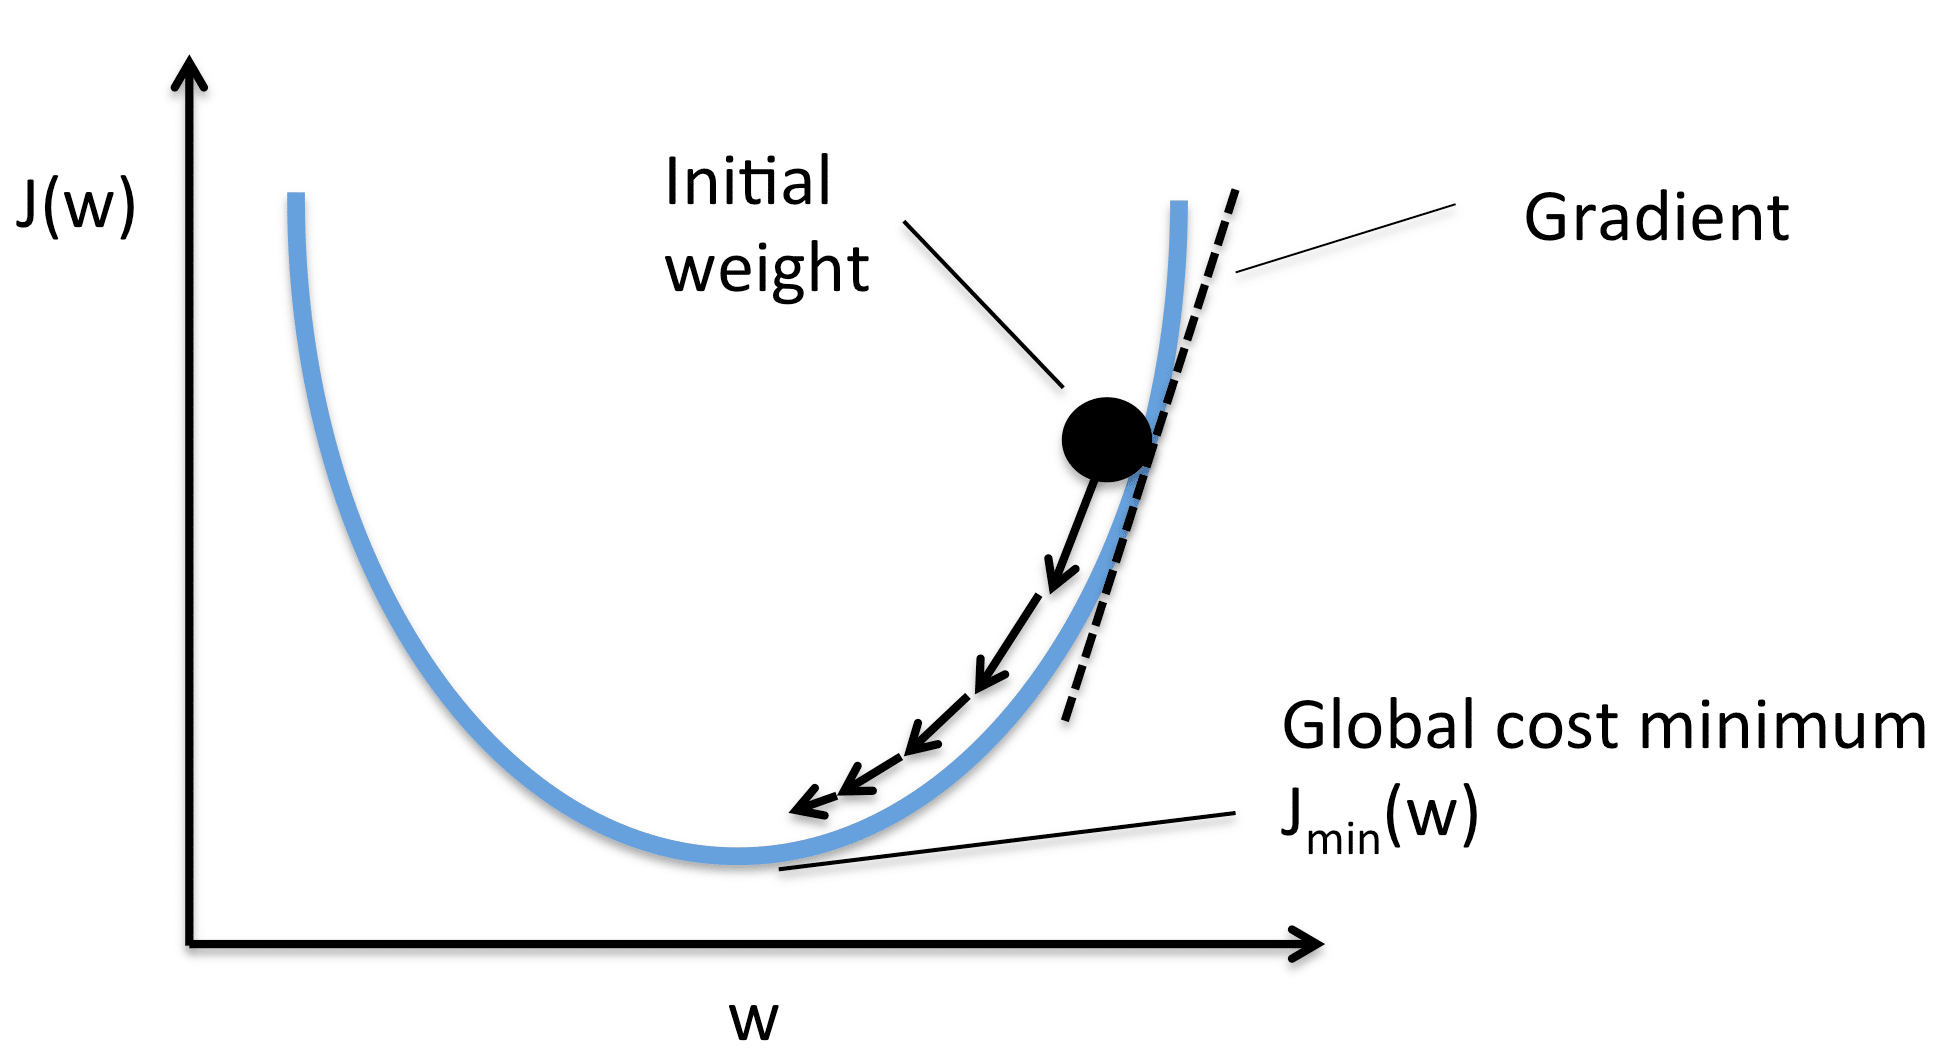

### Pochodna jest dodatnia -> chcemy zmniejszyć wartość w
$w_{new} = w_{old} - \frac{dJ}{dw}$

### Pochodna jest dodatnia -> chcemy zwiększyć wartość w
w=1 

J(w) = 3 

dJ/dw(1) = -2 

w' ma być większe 

w= = 1 - (-2) = 3 -> w' faktycznie większe 

$w_{new} = w_{old} - \frac{dJ}{dw}$

### Algorytm:
$w_{new} = w_{old} - \eta \frac{dJ}{dw}$, gdzie: $\eta$ - learning rate

**Inaczej:**

$w_{new} = w_{old} + step $

$step = - learning\_rate \frac{dJ}{dw}$

_W przypadku wielowymiarowym korzystamy z gradientu zamiast z pochodnej._

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

def visualise_gradient_decsent(f, grad_f, theta=-2, learning_rate=0.1, sec=2, x=np.linspace(-5, 11, 100)):
    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.
    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody
    """
    y = f(x)
    
    for i in range(100):
        
        plt.figure(figsize=(8,8))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)
        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)
        theta_new = theta - learning_rate*grad_f(theta)
        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)
        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)
        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)
        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)
        delta = theta_new - theta
        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        theta = theta_new
        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


In [3]:
def f(x):
    return x**2 - 6*x + 12

def grad_f(x):
    return 2*x - 6

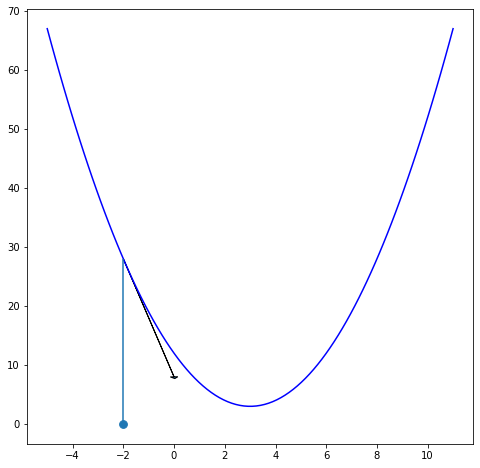

KeyboardInterrupt: 

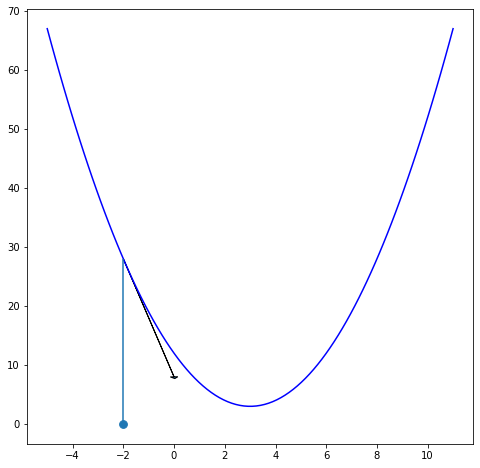

In [5]:
# UWAGA: Poniższe komórki przerywamy w trakcie działania jak już widzimy trend.
# W każdej można sobie zmieniać wartość parametru sec, np. sec=0.1, by było szybciej.

visualise_gradient_decsent(f, grad_f, learning_rate=0.1, sec=0.1, theta=-2)  # learning_rate = 10, 1.1, 0.001

In [6]:
def g(x):
    return x**4 - x**3 - 6*x**2 + 30

def grad_g(x):
    return 4*x**3 - 3*x**2 - 12*x

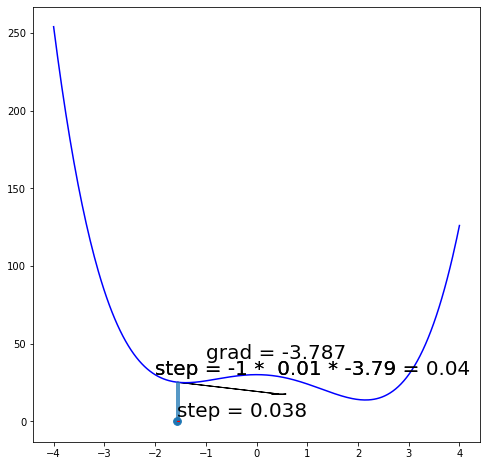

KeyboardInterrupt: 

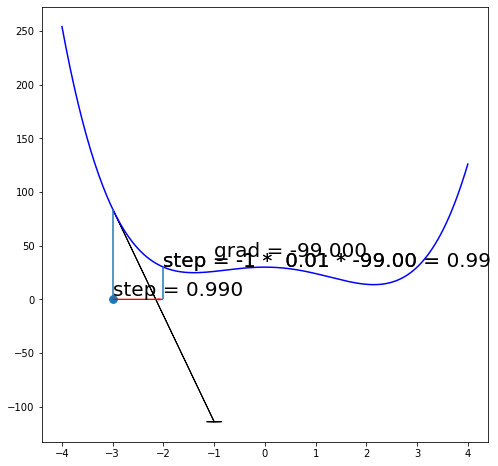

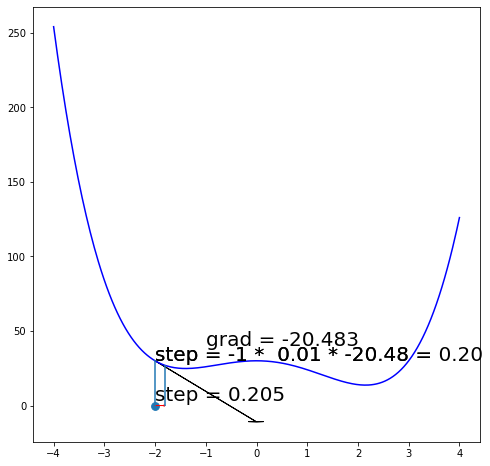

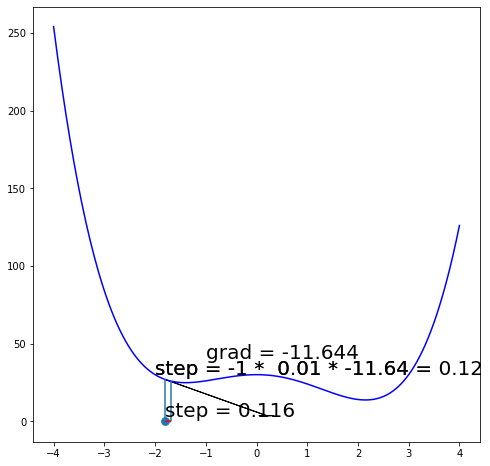

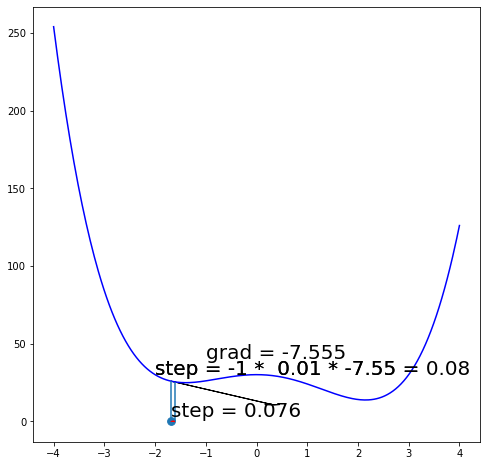

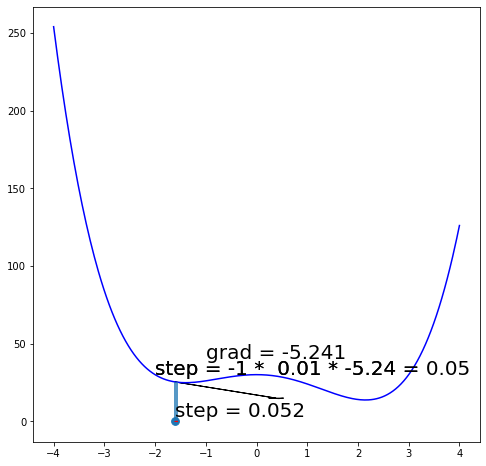

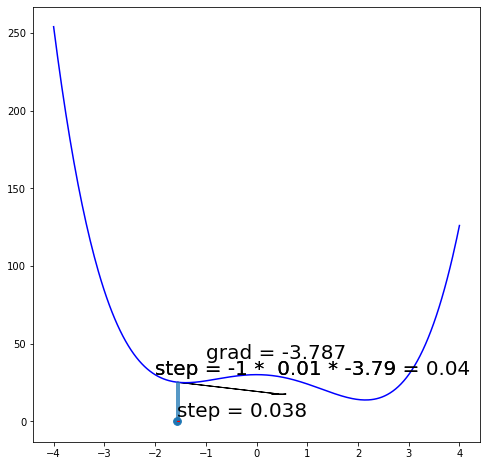

In [7]:
visualise_gradient_decsent(g, grad_g, learning_rate=0.01, sec=0.1, theta=-3, x=np.linspace(-4, 4, 300))

## Ćwiczenie
Learning rate dla funkcji g, żeby zejść do globalnego minimum.
W parach sprawdźcie jak działają różne learning raty dla 2 funkcji. W szczególności spróbujcie odpowiedzieć na pytania:

1. Czy istnieje najlepszy lr? Ile wynosi?

 - dla każdej funkcji może być inny
 - dla każdego punktu startowego będzie działało inaczej

2. Co się dzieje, gdy lr jest za mały?
 - dojdziemy do minimum lokalnego, nie globalnego
 - więcej iteracji
3. Co się dzieje, gdy lr jest za duży?
 - wyskoczymy z funkcji
 - skakanie pomiędzy minimami
 - "maksymalizacja" zamiast minimalizacji

Funkcję f/g nazywamy **funkcją straty (loss function)**. Spróbujcie sprecyzować odpowiedzi na pytania 2 i 3 mając na uwadze jedynie to jak się zmienia wartość funkcji f/g, a nie argument.

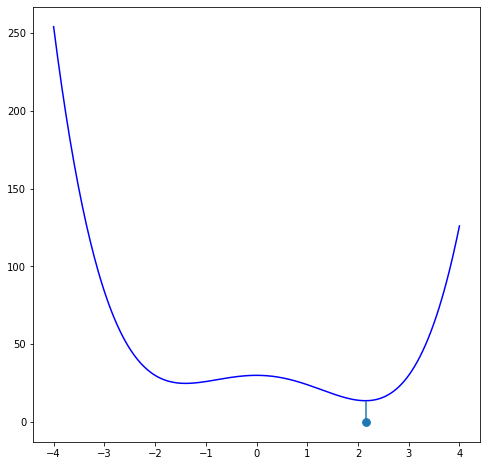

KeyboardInterrupt: 

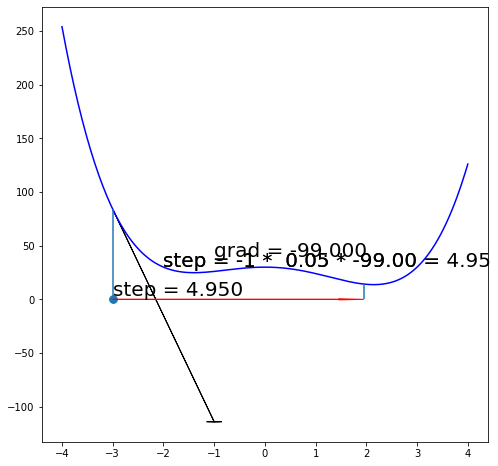

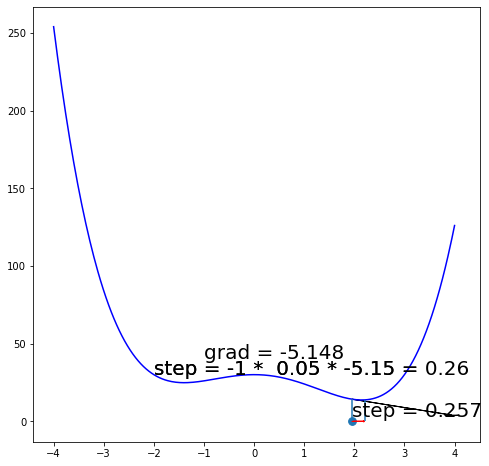

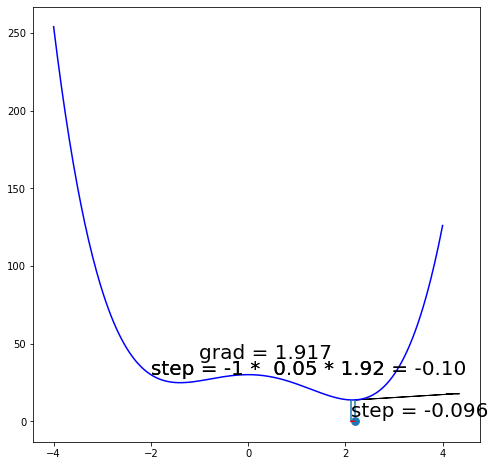

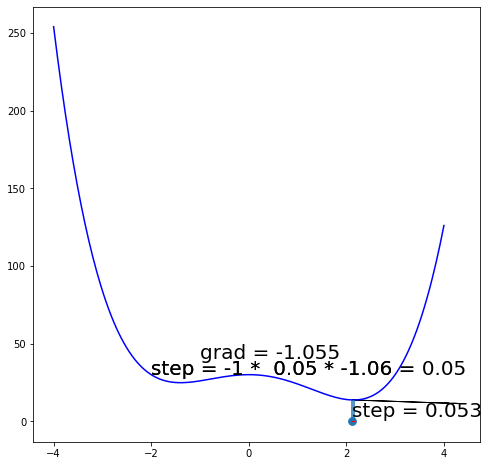

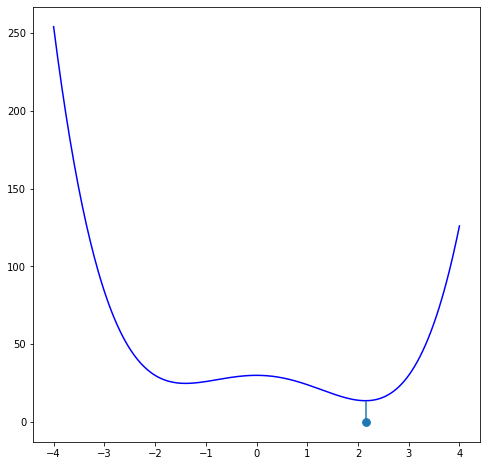

In [8]:
visualise_gradient_decsent(g, grad_g, learning_rate=0.05, theta=-3, sec=0.1, x=np.linspace(-4, 4, 300))

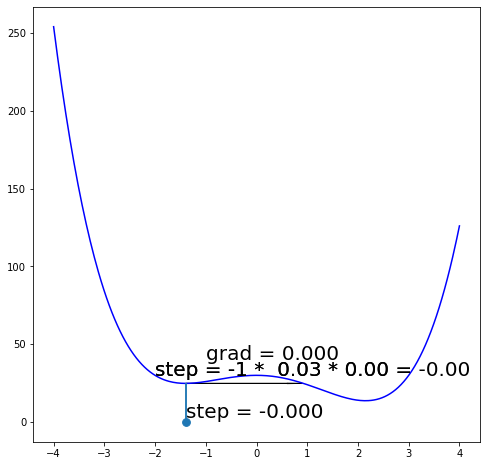

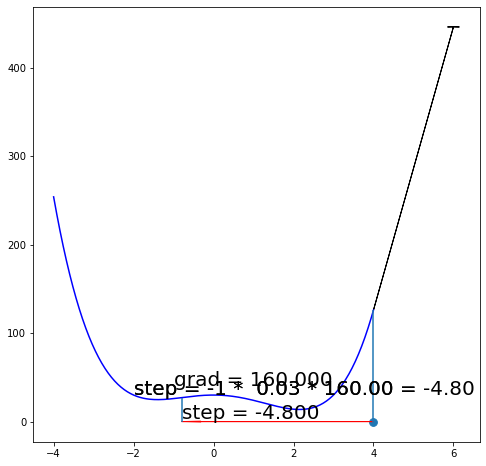

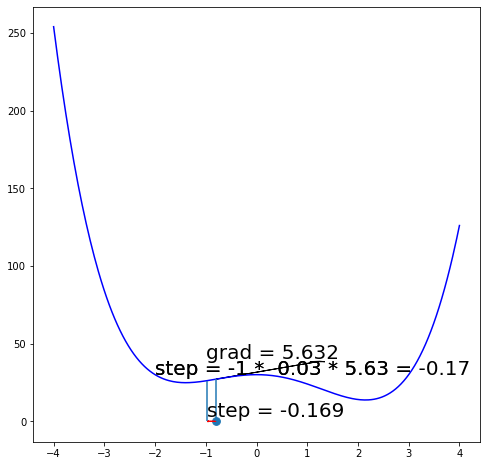

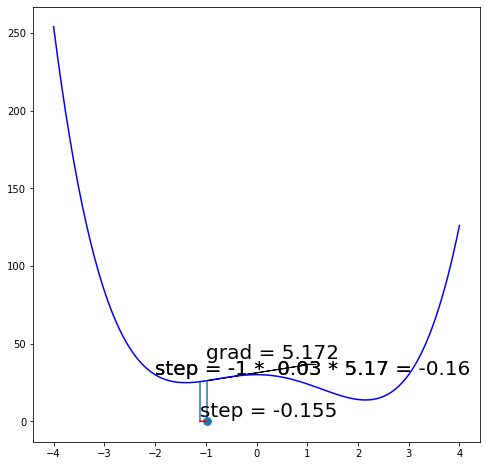

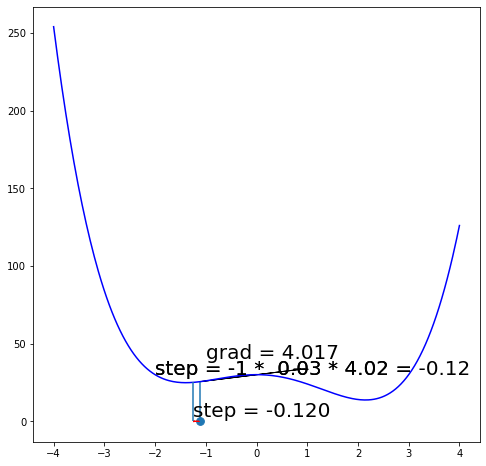

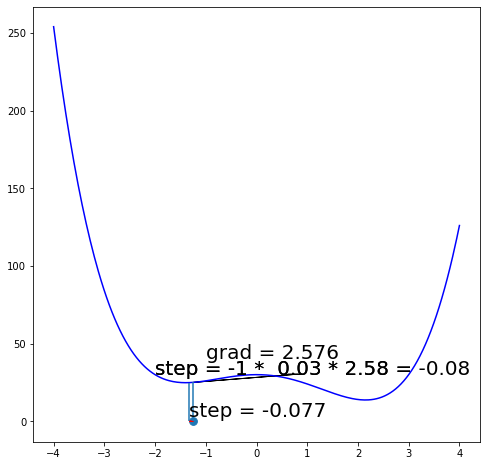

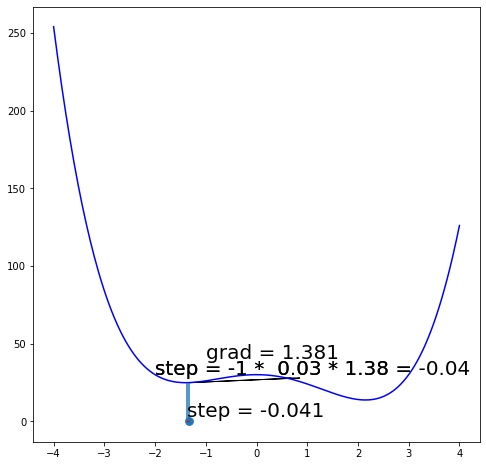

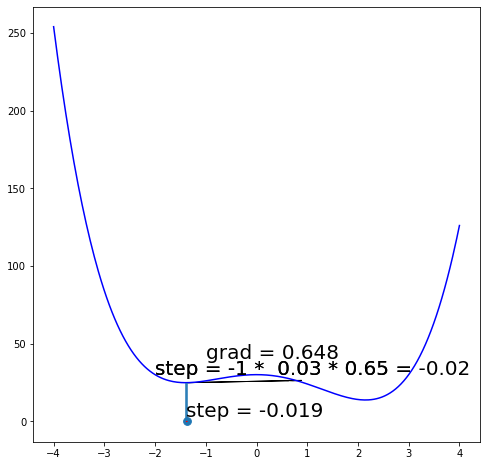

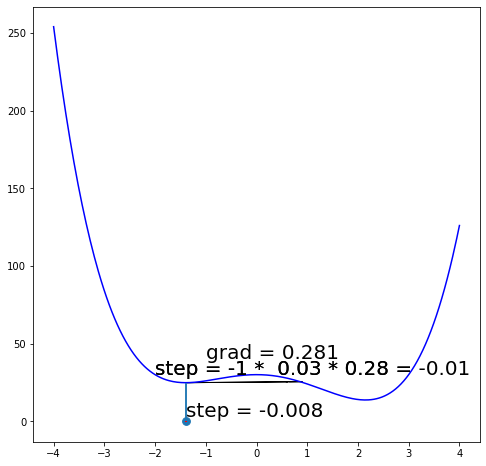

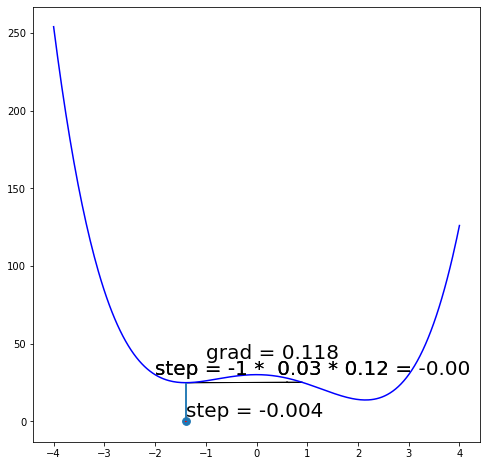

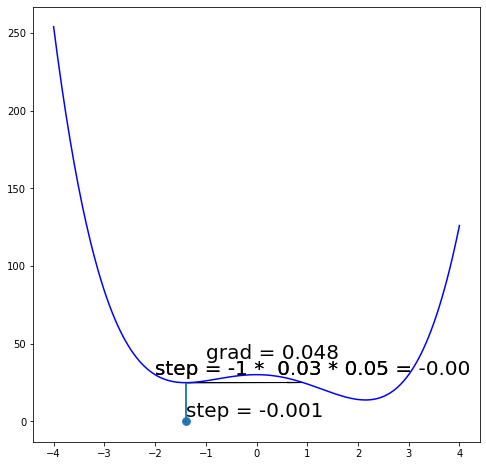

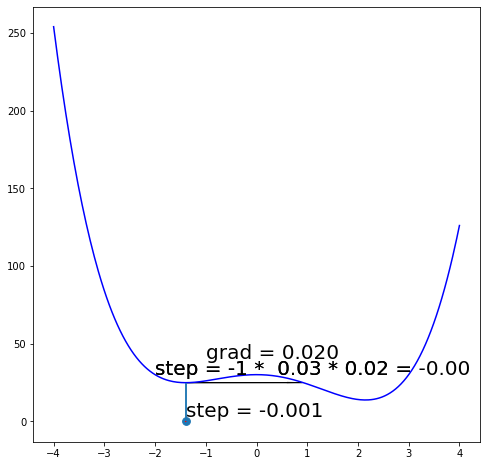

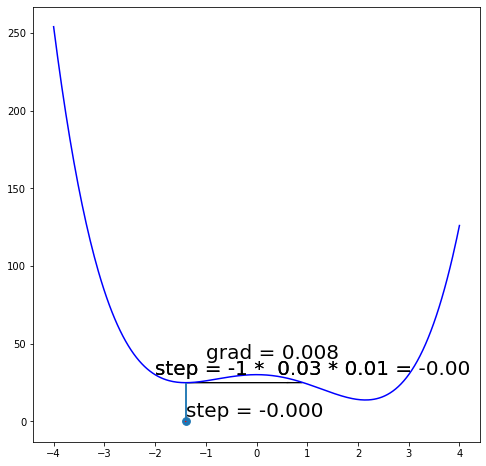

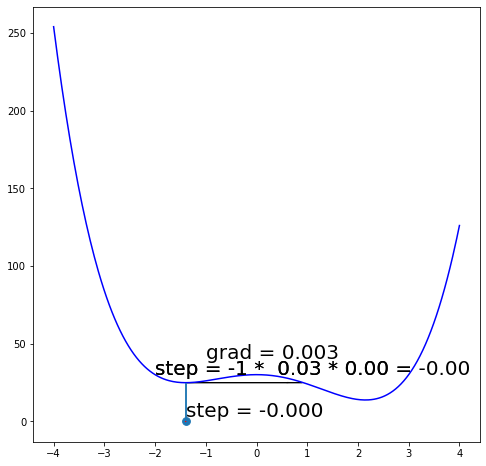

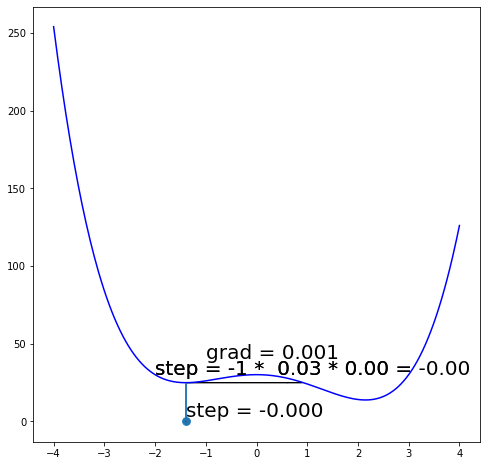

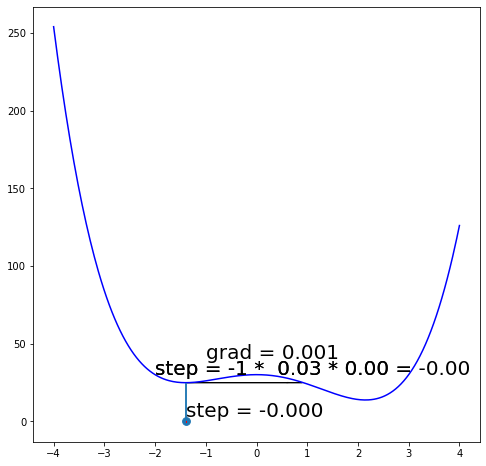

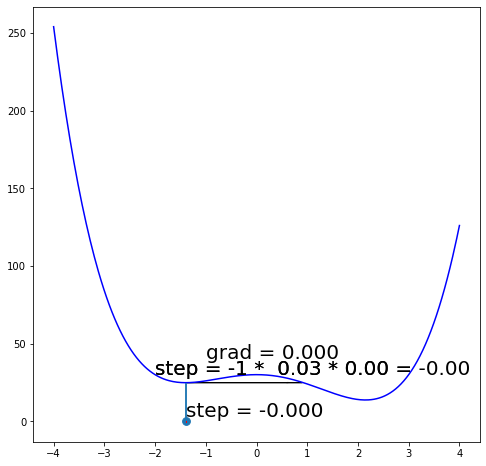

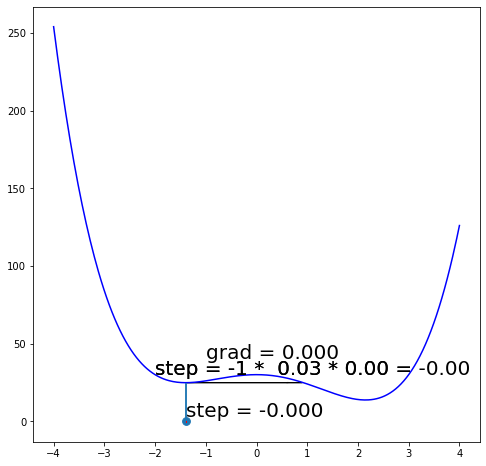

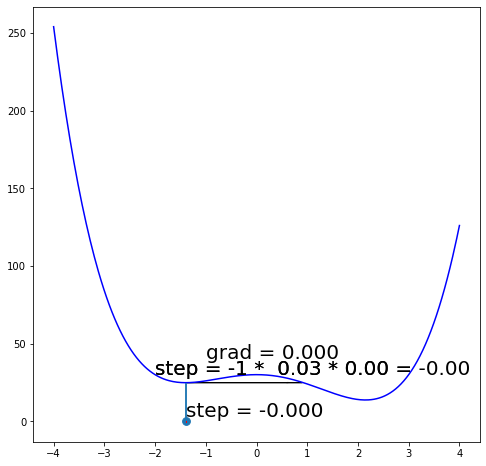

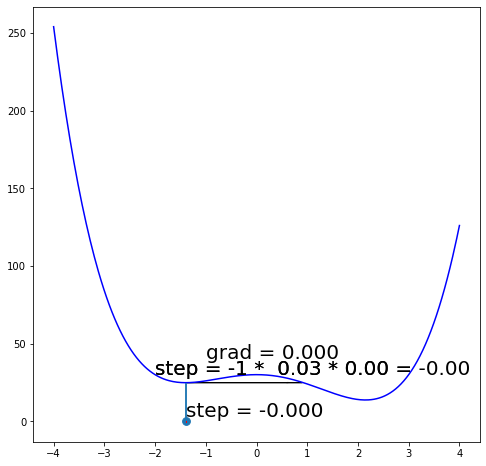

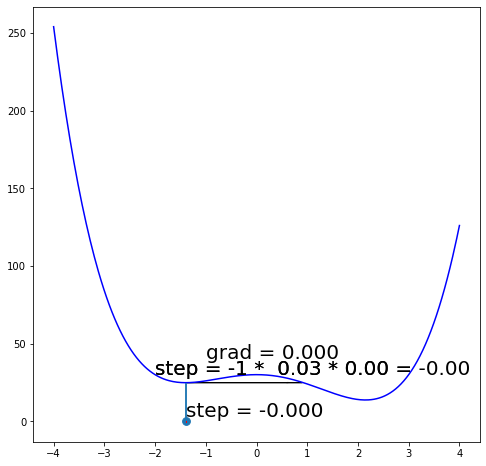

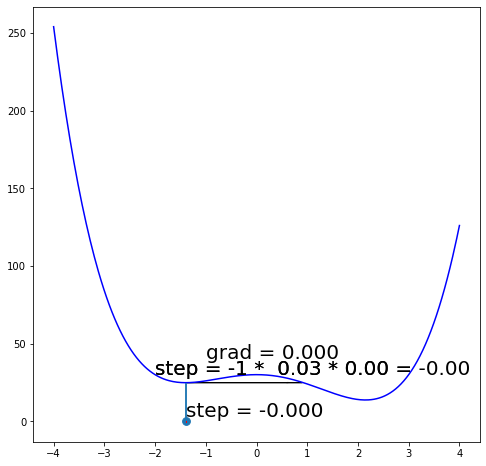

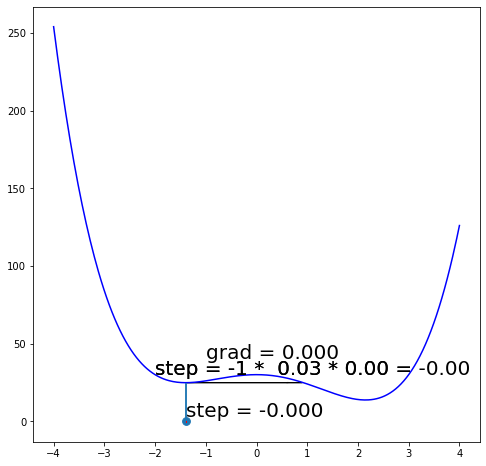

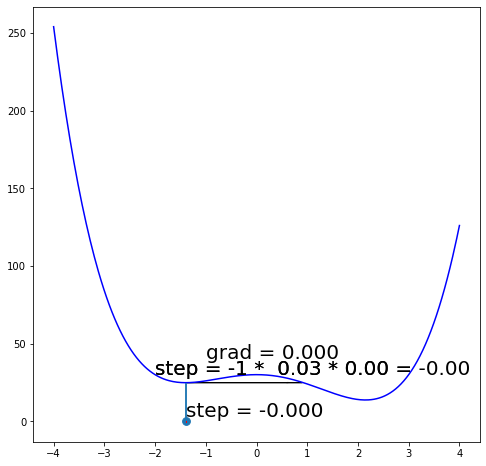

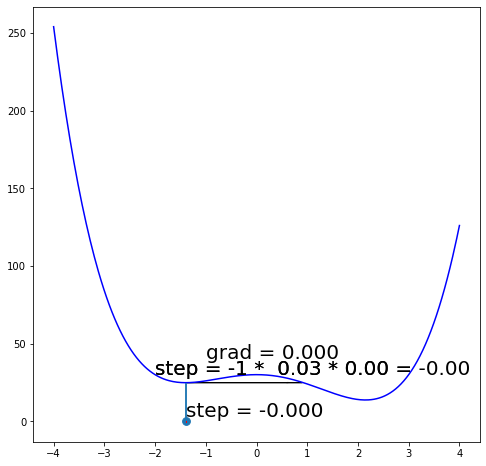

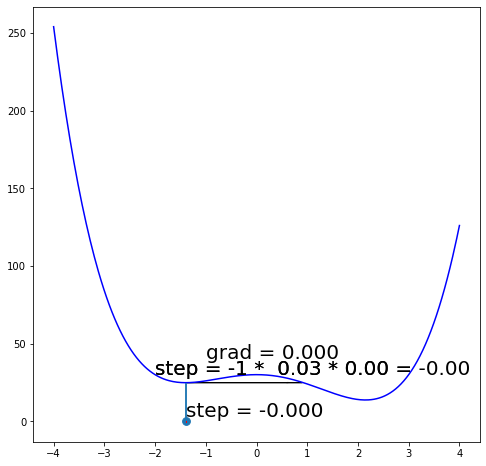

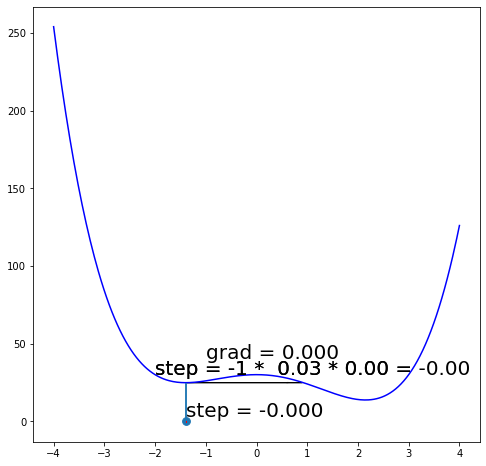

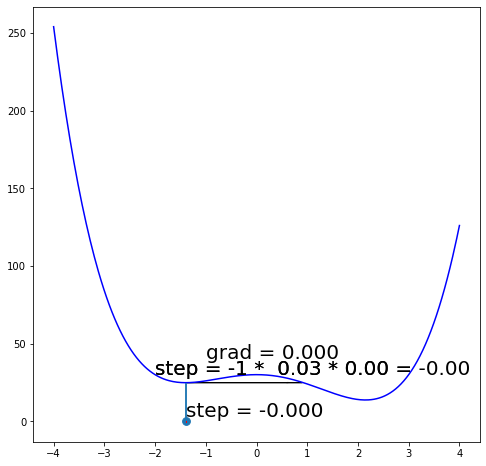

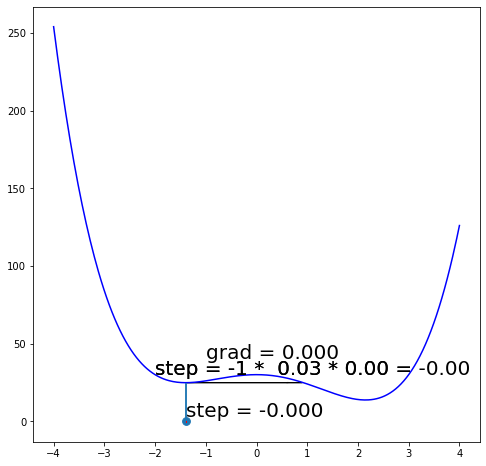

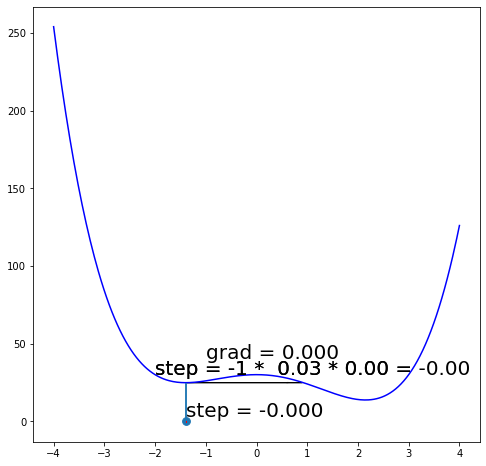

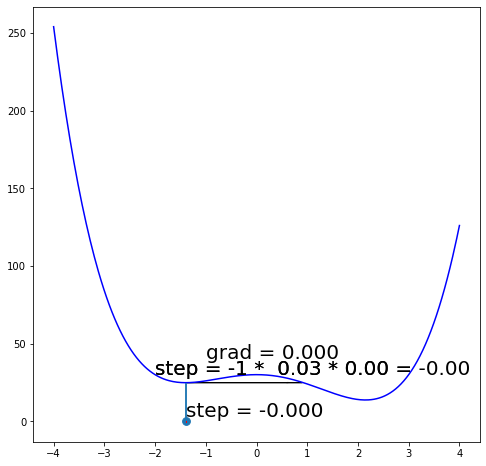

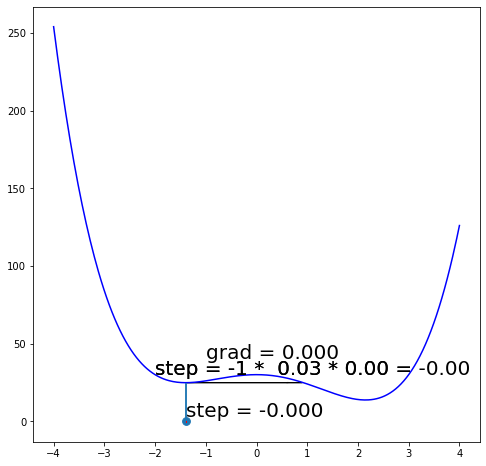

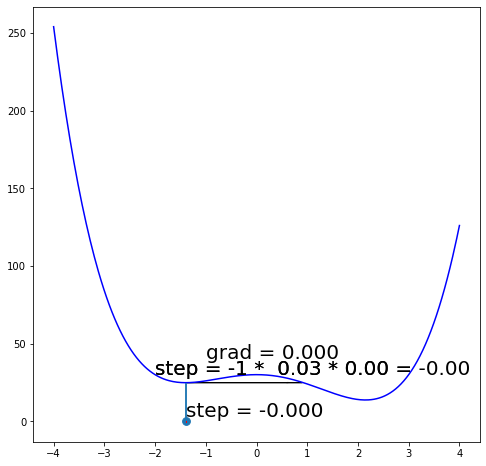

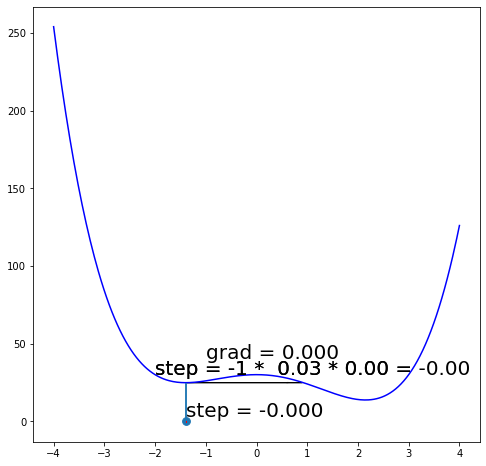

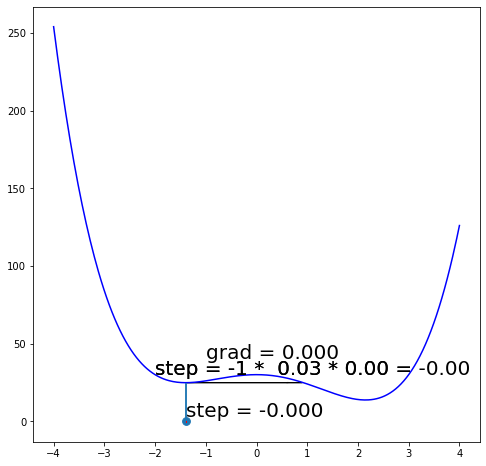

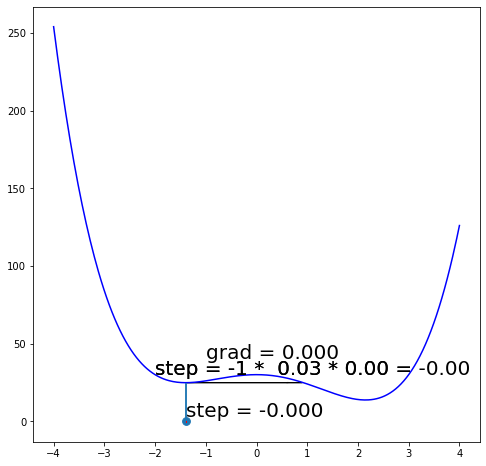

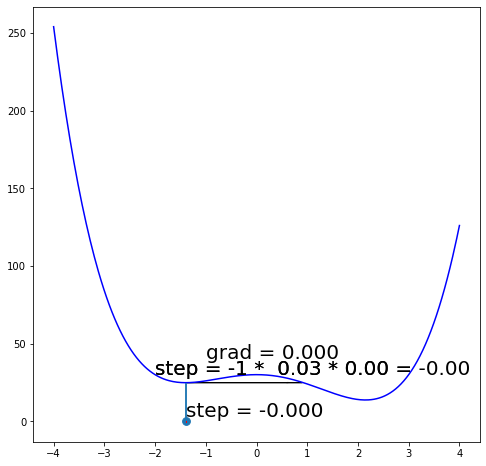

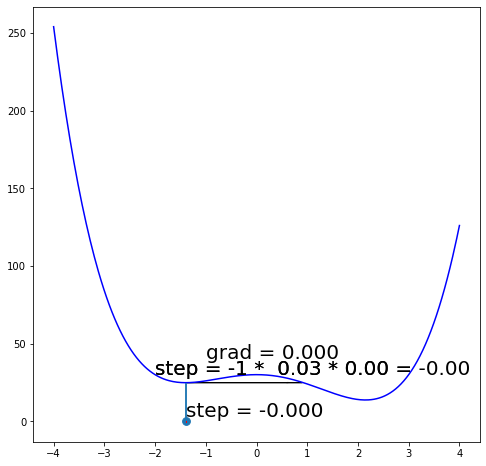

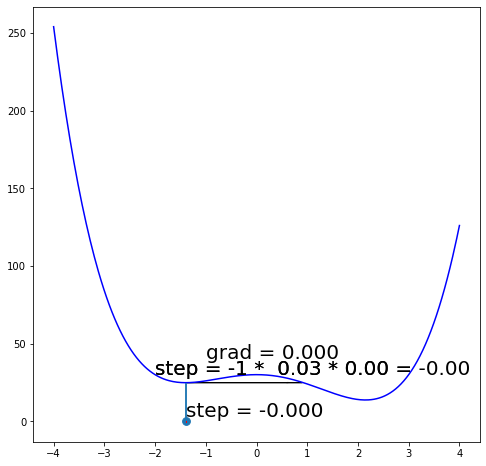

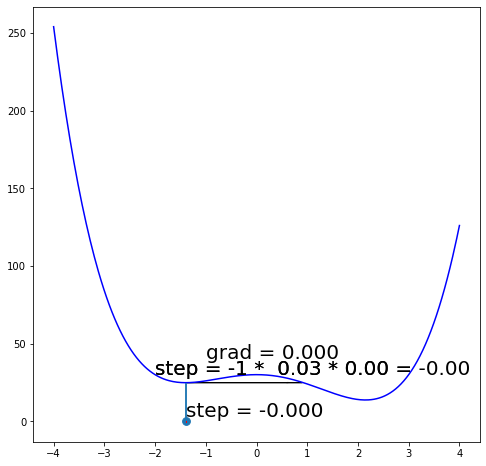

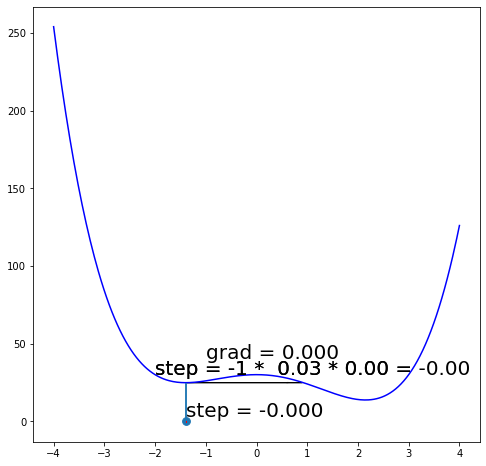

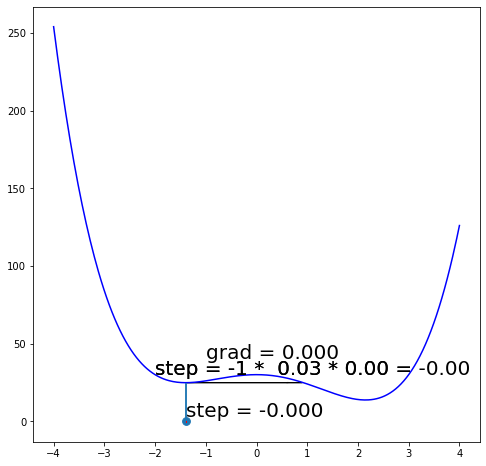

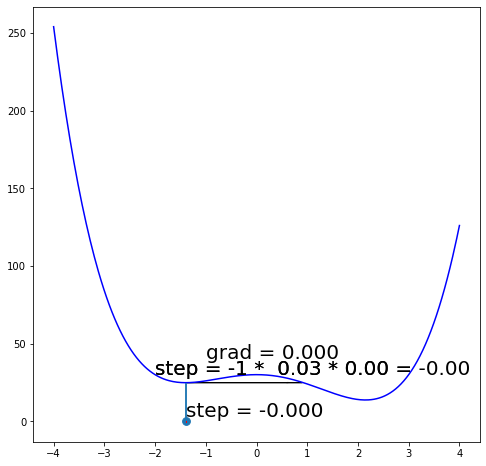

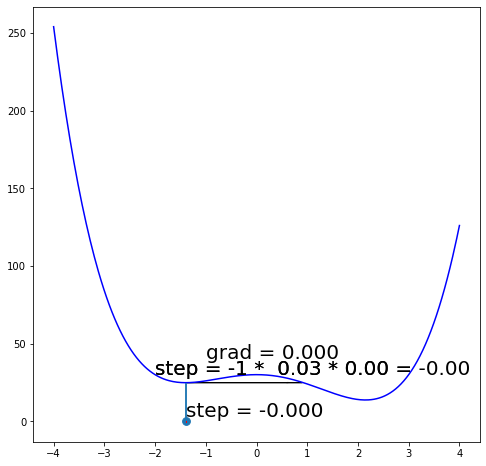

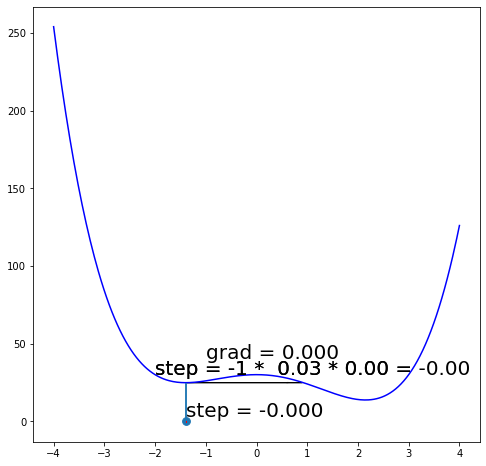

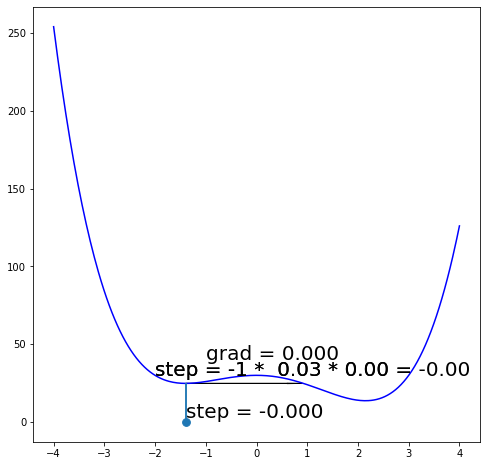

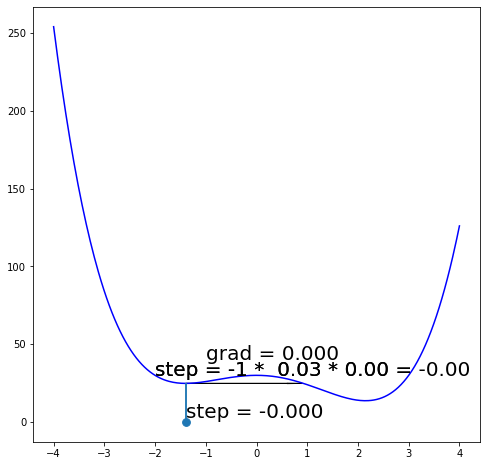

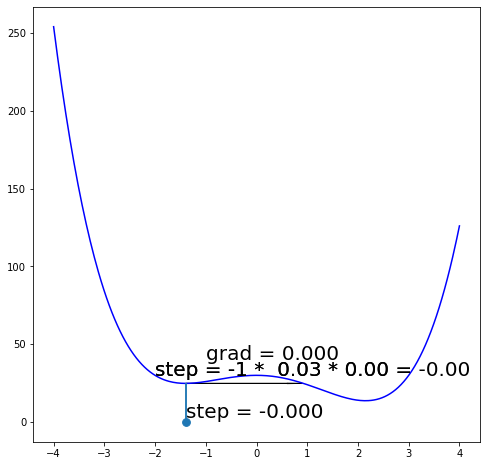

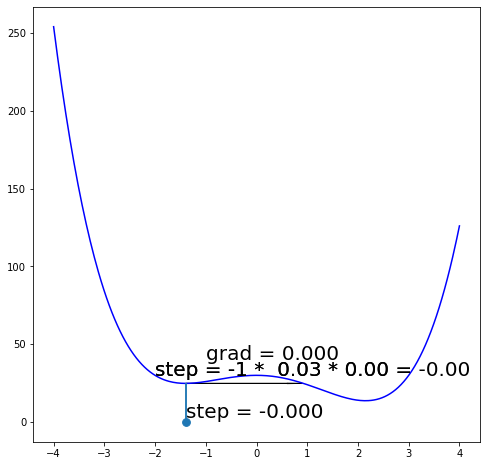

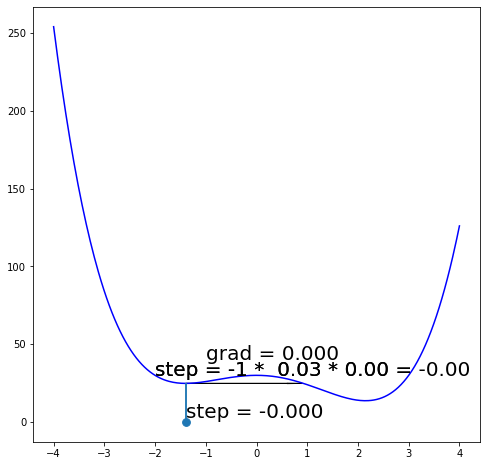

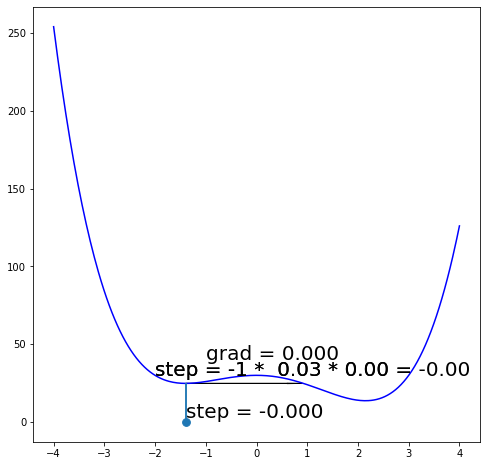

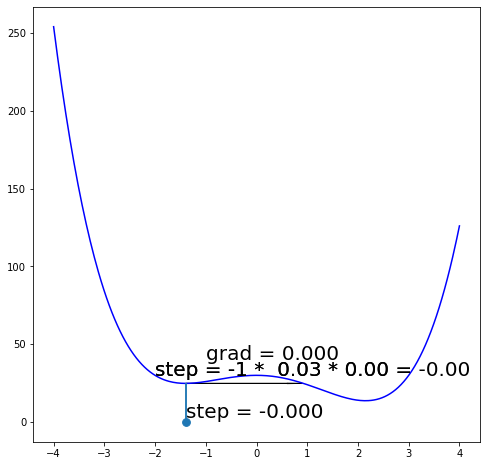

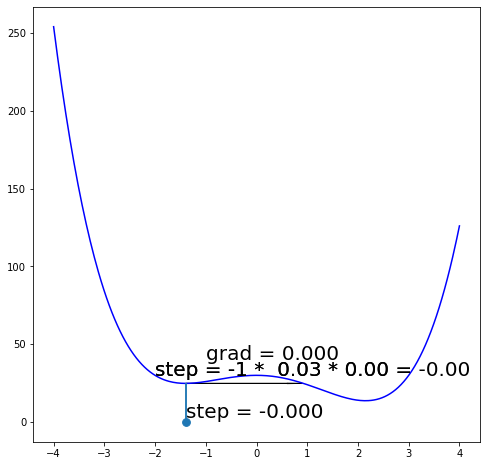

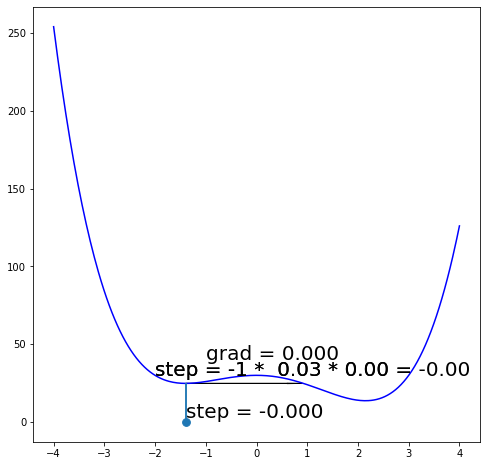

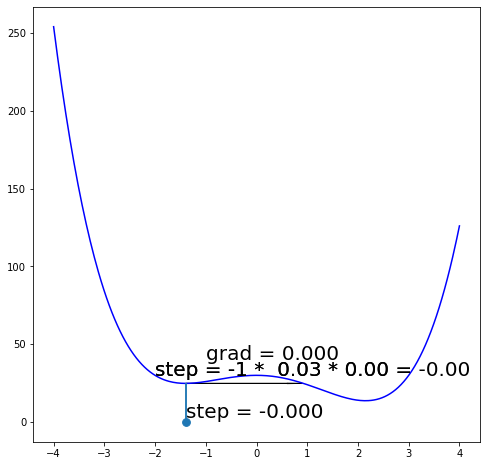

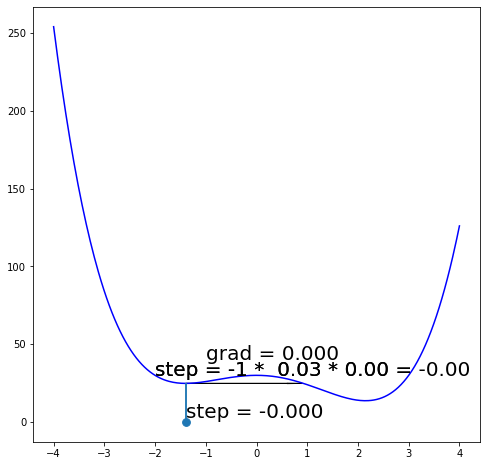

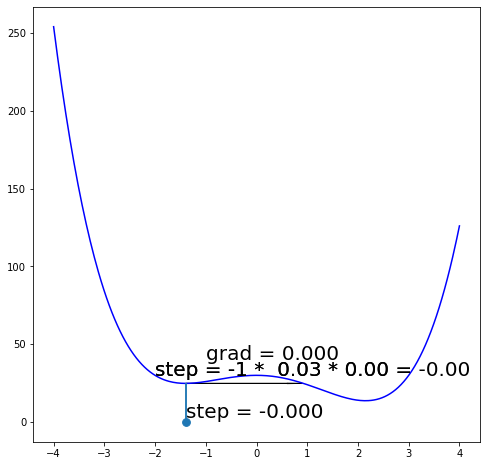

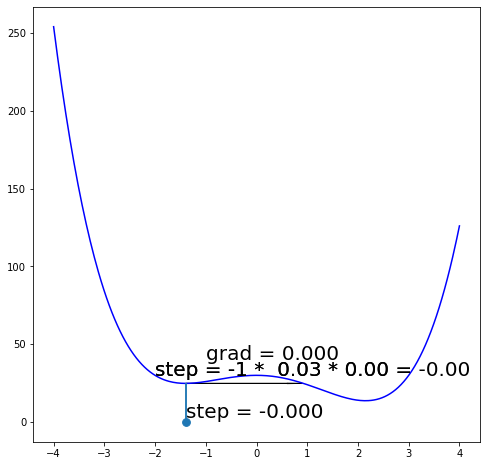

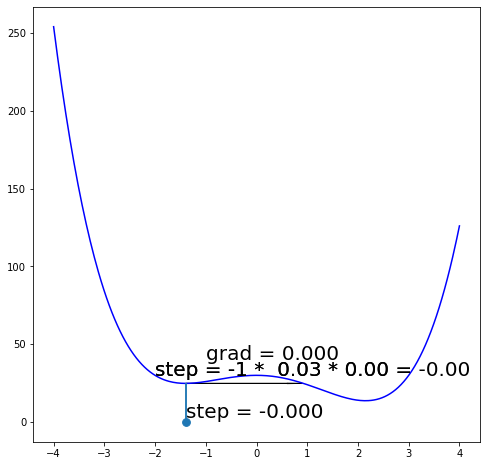

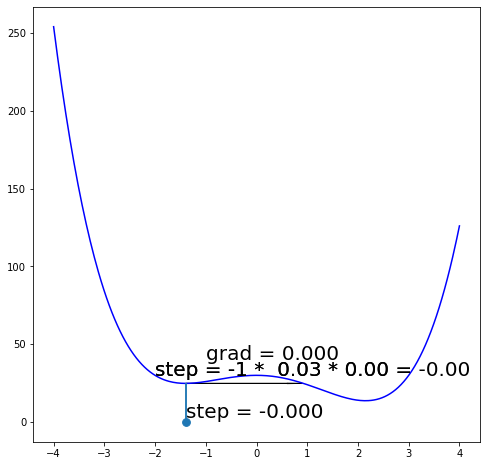

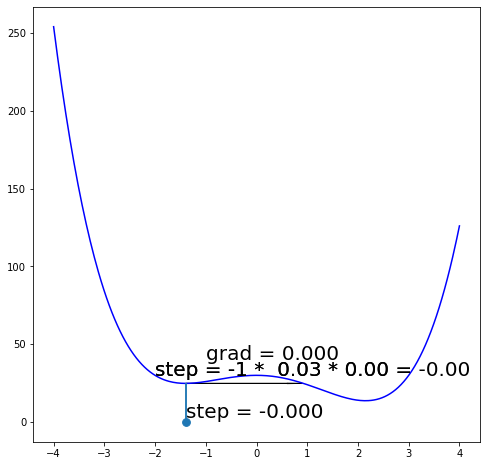

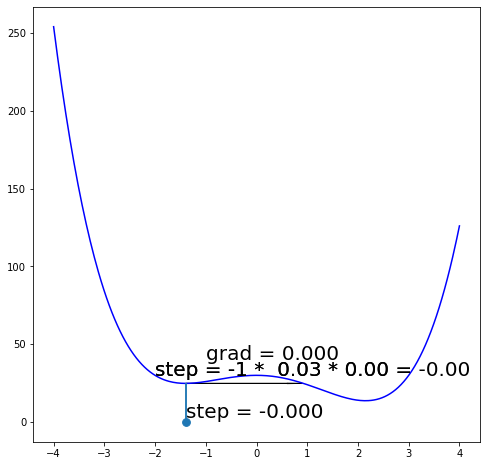

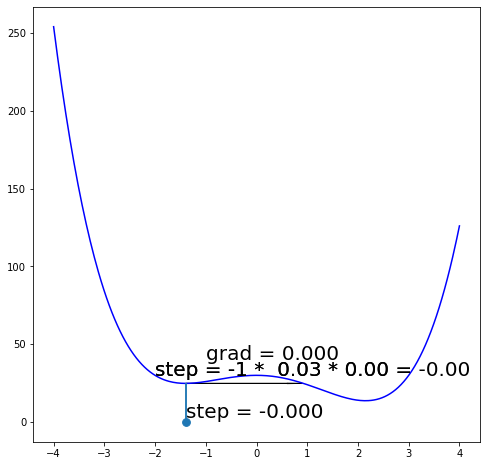

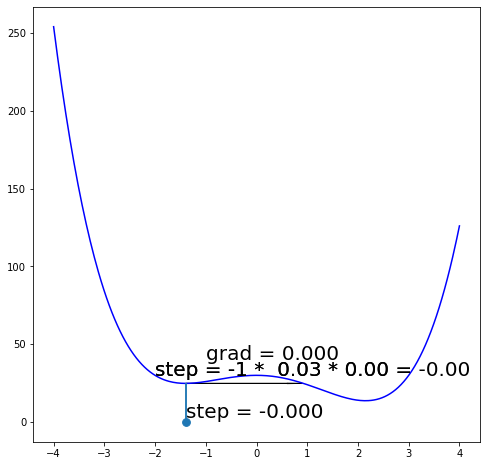

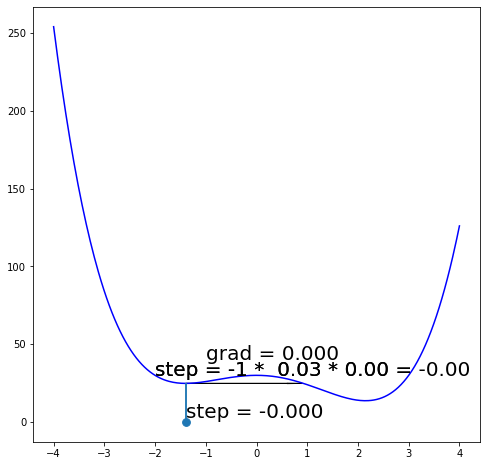

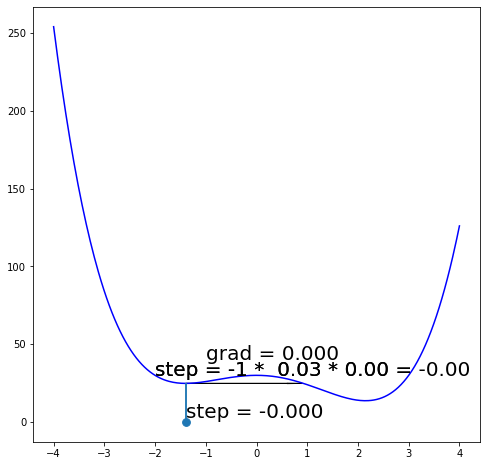

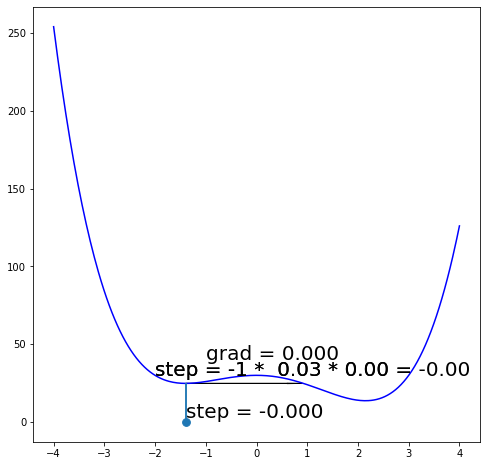

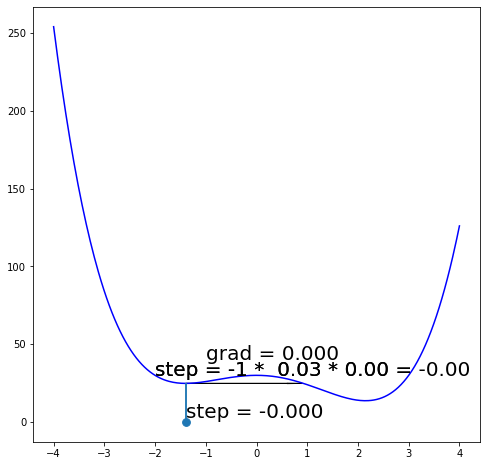

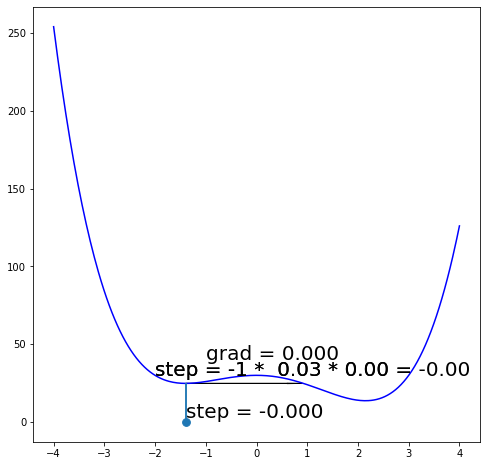

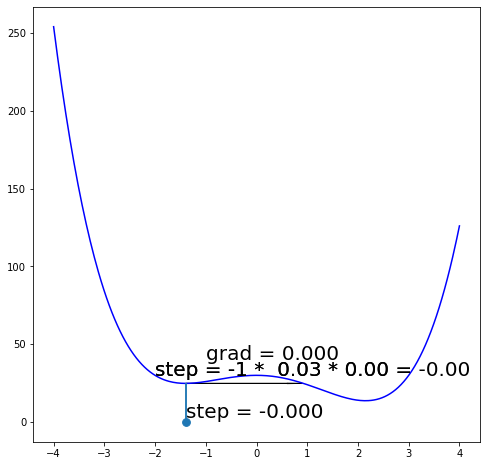

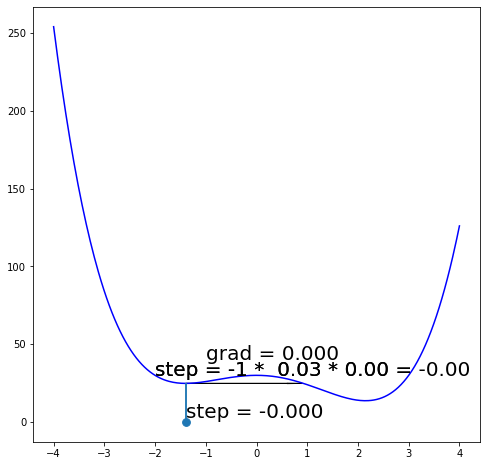

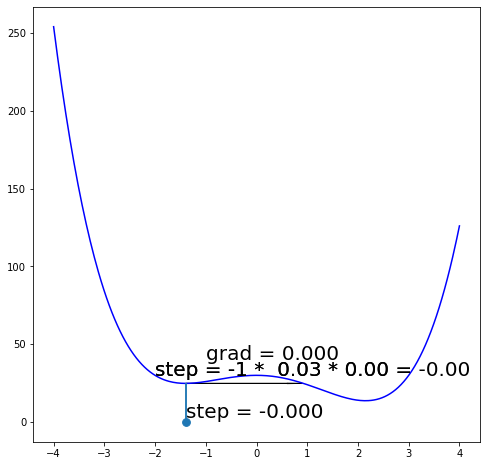

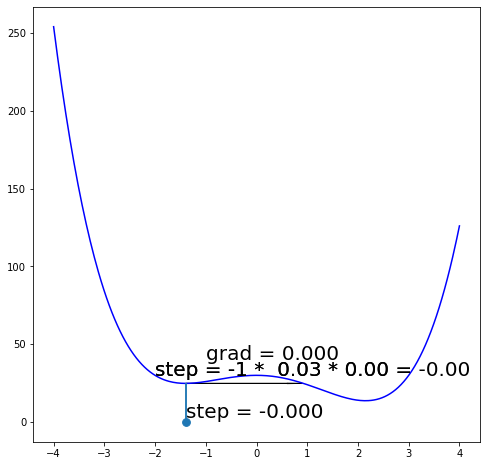

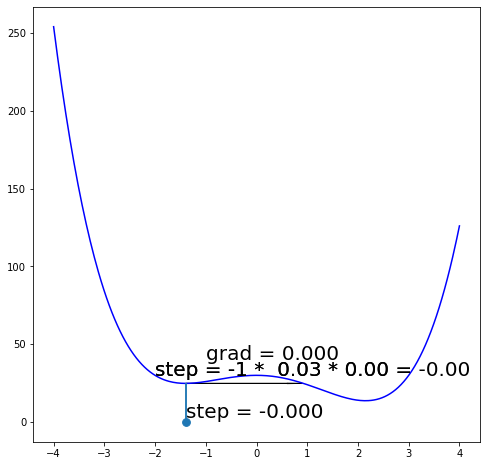

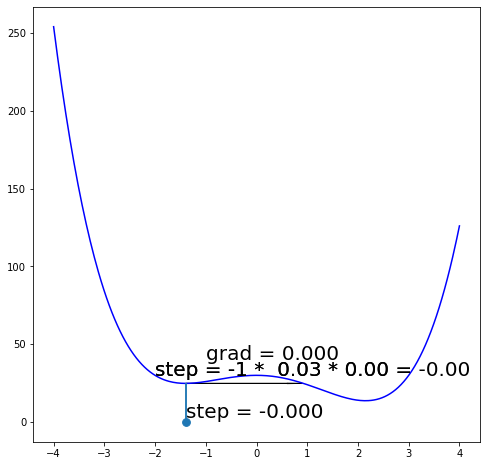

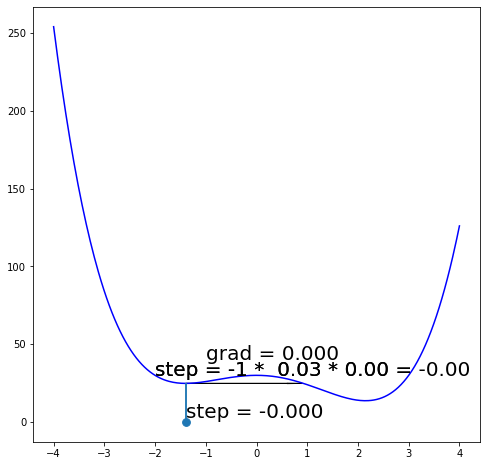

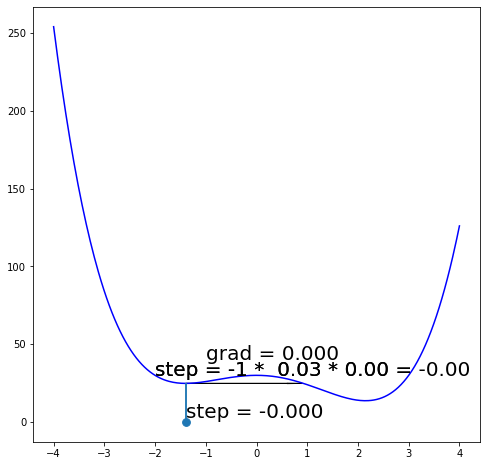

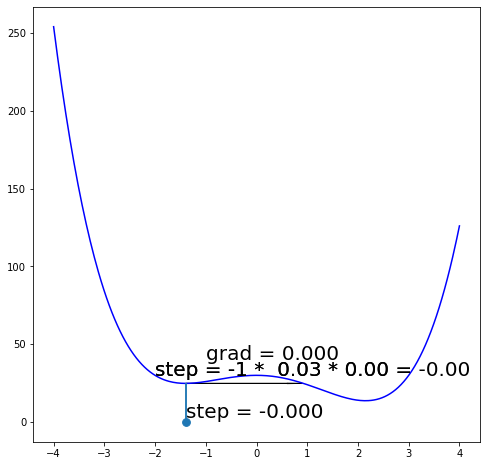

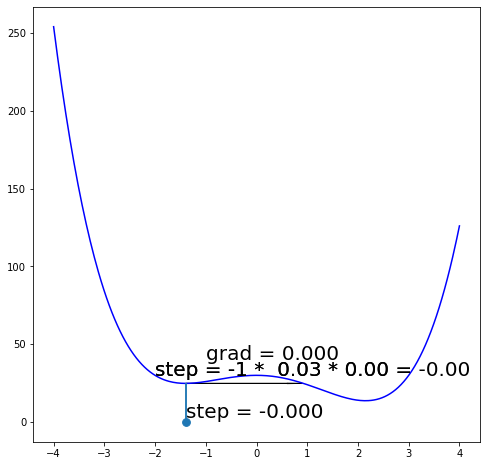

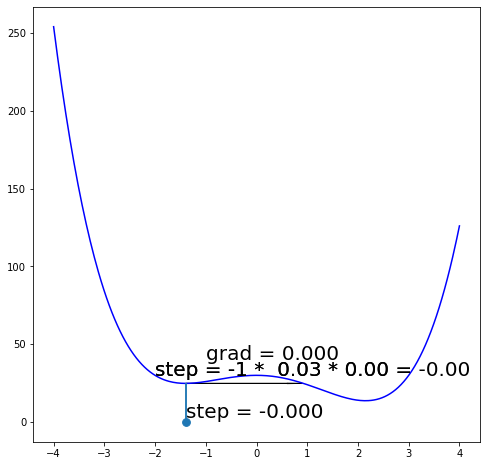

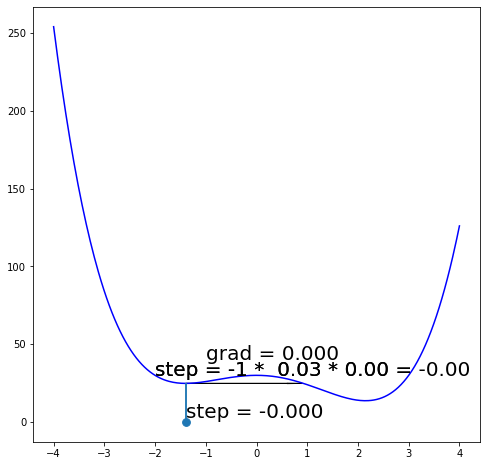

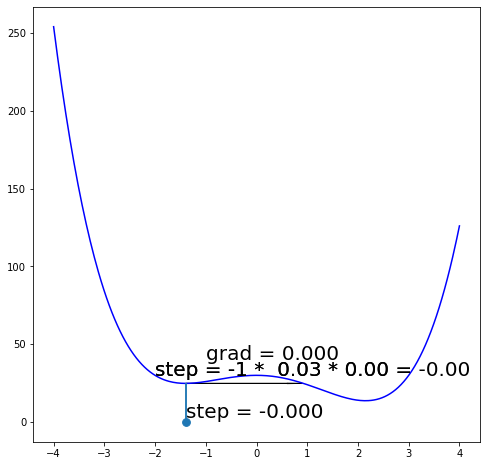

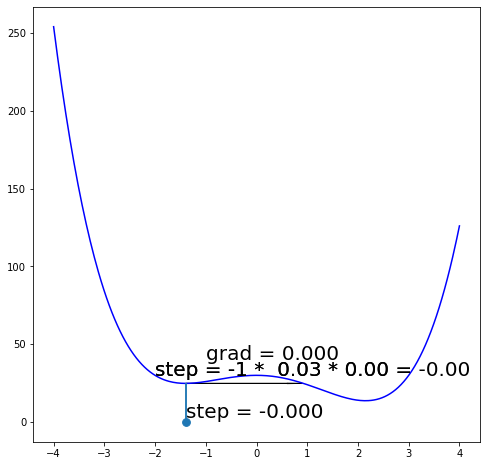

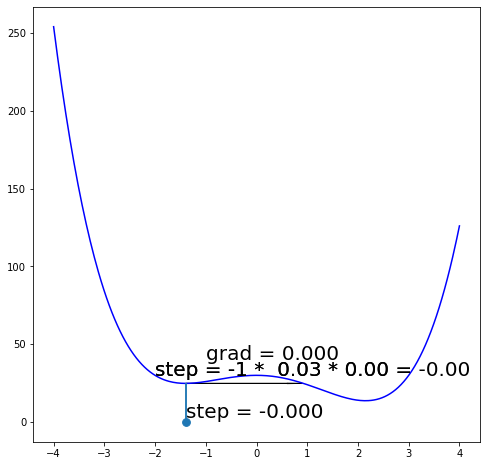

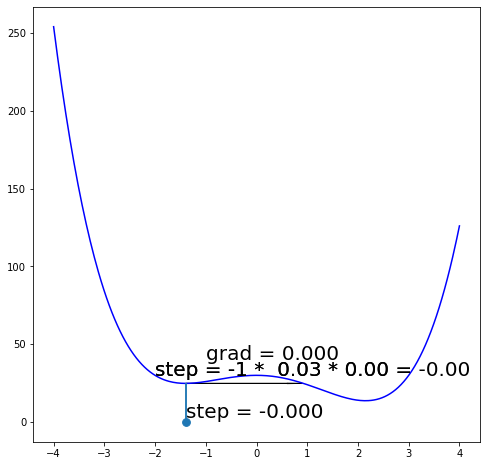

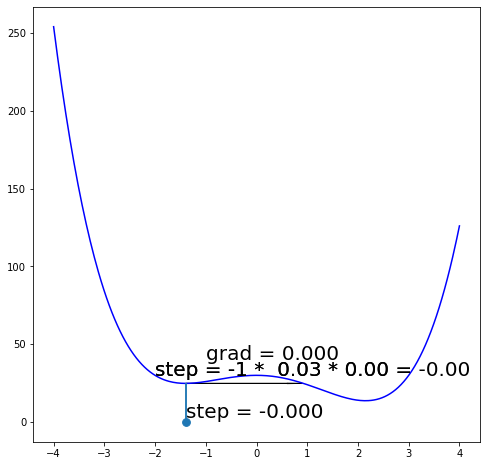

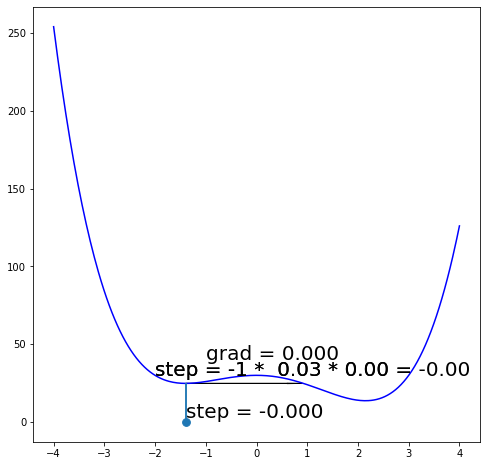

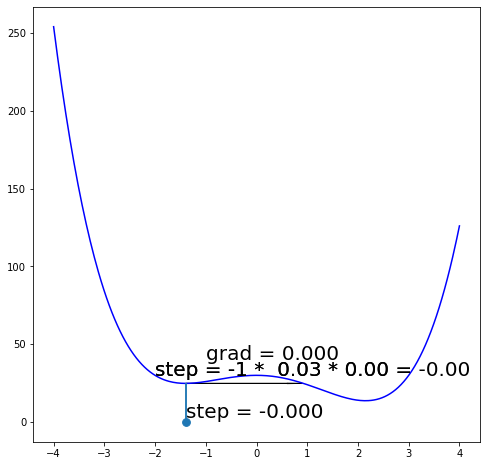

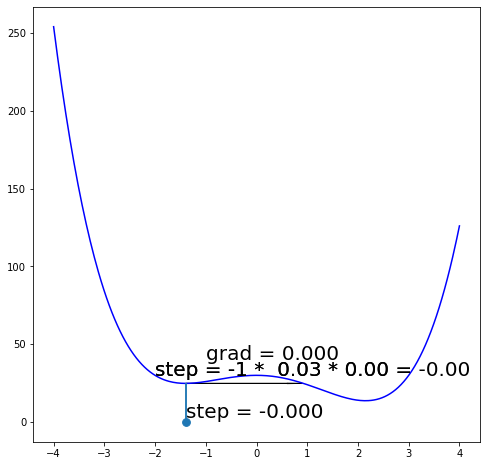

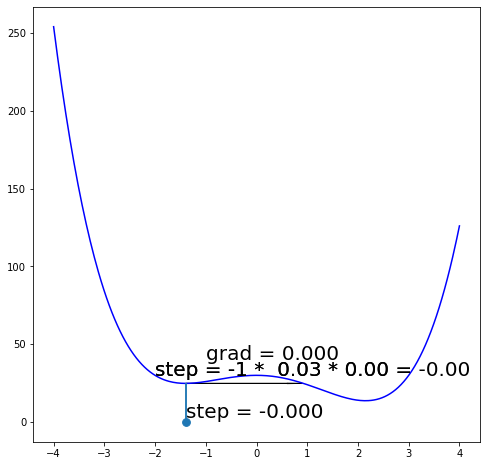

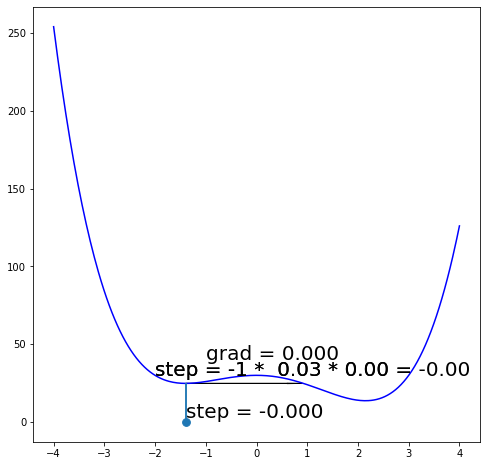

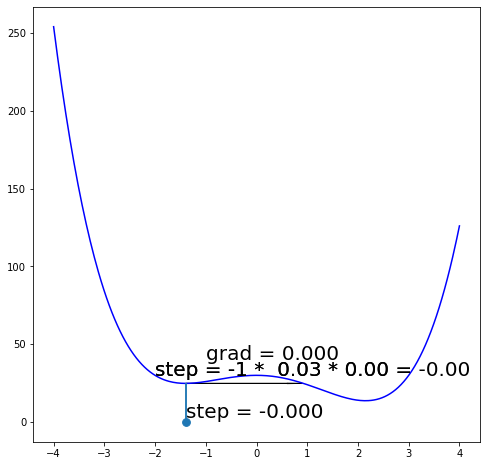

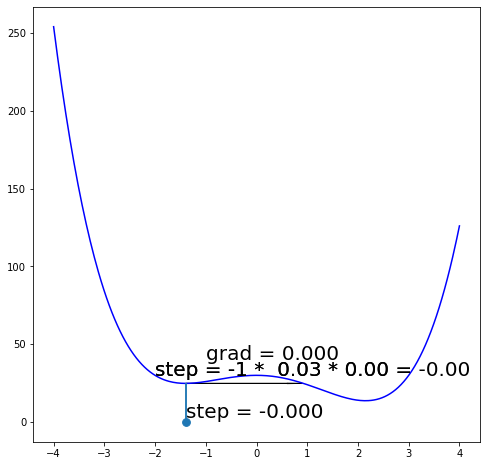

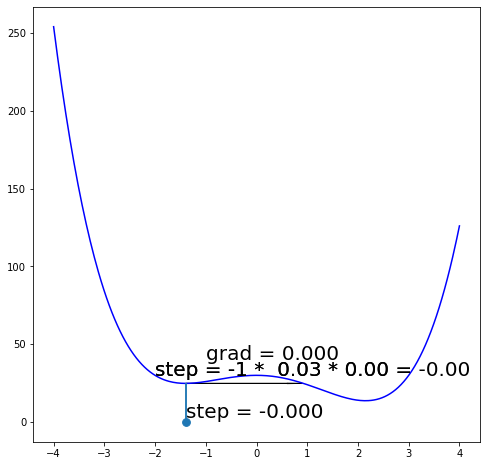

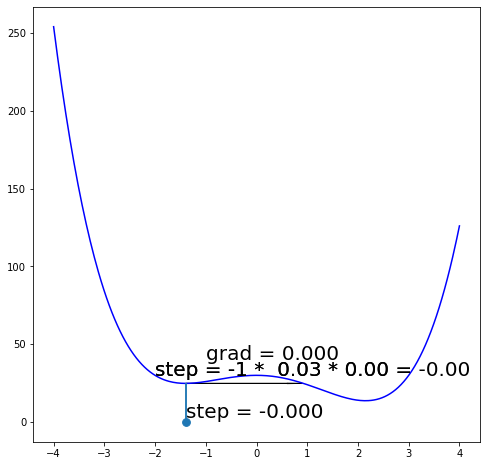

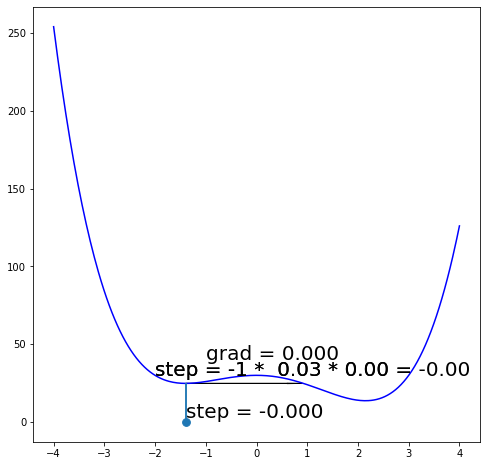

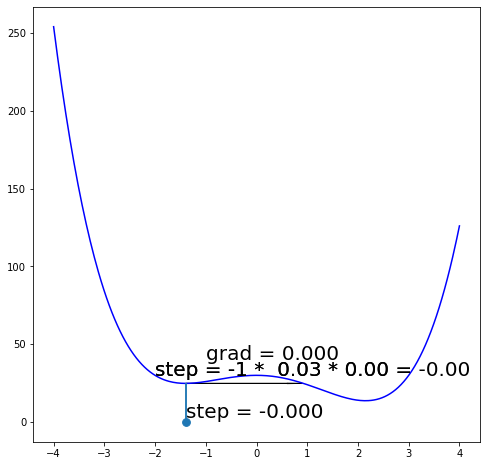

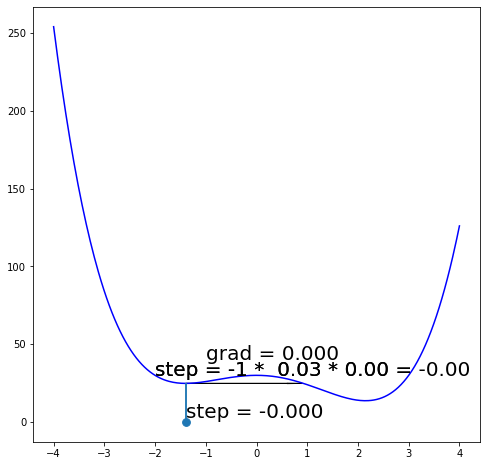

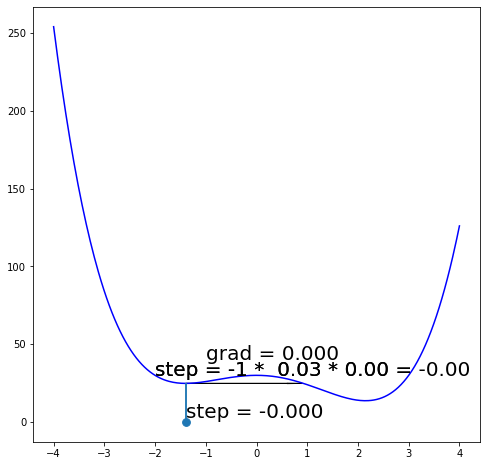

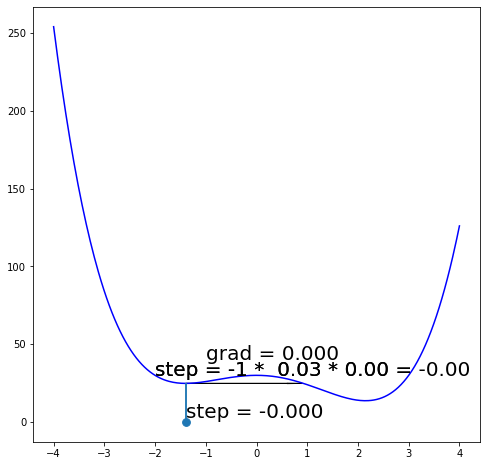

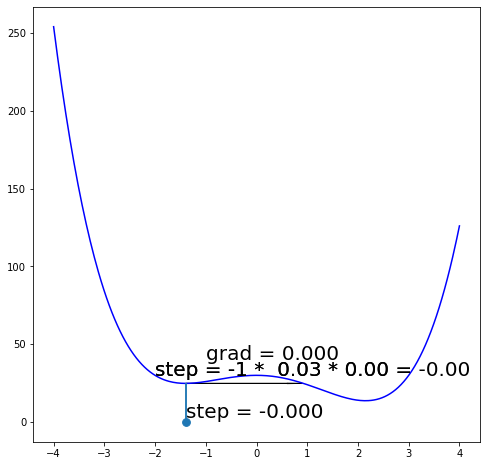

In [12]:
visualise_gradient_decsent(g, grad_g, learning_rate=0.03, theta=4, sec=0.02, x=np.linspace(-4, 4, 300))

## Gradient Descent:
$$ Loss(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta = \theta - learning\_rate * \frac{dLoss}{d\theta}$$

Uczenie (optymalizacja) odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Stochastic Gradient Descent  (SGD)

$$ Loss(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$ \ \ \text{Wybieramy} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$ \tilde{Loss}(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \} } f(x_i,y_i,\theta),$$ 
$$\theta_{new} = \theta_{old} - learning\_rate * \frac{d\tilde{Loss}}{d\theta}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

**Adam** - optimizer bazujący na SGD. _W praktyce częstym batchem jest 32. Często korzystamy z potęg dwójki._

## Perceptron (neuron)

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif

### Funkcje aktywacji

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid: $\sigma(x) = \frac{1}{1+\exp{(-x)}}$
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

https://keras.io/api/layers/activations/

## Case study 1 - cukrzyca

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
dataset = np.loadtxt('./pima-indians-diabetes.data', delimiter=',')
dataset[:3, :]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ,   1.   ]])

In [3]:
np.count_nonzero(dataset[:, 2])

733

In [4]:
# obsługa zer - zamiana na średnią

blood = dataset[:, 2]
blood[blood==0] = np.mean(blood[blood!=0])
dataset[:, 2] = blood

In [5]:
np.count_nonzero(dataset[:, 2])

768

In [9]:
# inny sposób na zamianę zer - wykorzystanie modułu pandas

dataset = pd.read_csv('./pima-indians-diabetes.data', delimiter=',', header=None)
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
blood = dataset.iloc[:, 2]
blood = blood.replace({0: np.mean(blood[blood!=0])})

dataset.iloc[:, 2] = blood
dataset = np.array(dataset)

In [11]:
X = dataset[:, :8]
y = dataset[:, 8]

In [12]:
np.mean(y)  # 35% pacjentów ma cukrzycę

0.3489583333333333

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [15]:
X_train.mean(axis=0)

array([  3.77361564, 121.04560261,  72.28949567,  20.59771987,
        80.03094463,  32.23241042,   0.4602557 ,  33.18729642])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [18]:
X_train[:, 0] = X_train[:, 0] * 1000000
X_test[:, 0] = X_test[:, 0] * 1000000

In [19]:
np.random.seed(123)

models =  [DecisionTreeClassifier(),
          make_pipeline(StandardScaler(), KNeighborsClassifier()),
          LogisticRegression()]  # działa gorzej bez standaryzacji (po standaryzacji wyniki podobne do innych)

for i, model in enumerate(models):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model {i}: {model.__class__.__name__}, accuracy: {accuracy_score(y_test, y_pred)}")
    

Model 0: DecisionTreeClassifier, accuracy: 0.7597402597402597
Model 1: Pipeline, accuracy: 0.7792207792207793
Model 2: LogisticRegression, accuracy: 0.6233766233766234


In [20]:
from sklearn.neural_network import MLPClassifier  # Multi-layered perceptron (MLP)

?MLPClassifier

In [22]:
model = MLPClassifier(hidden_layer_sizes=[10])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)  # wydajność pomiędzy 40% a 60% --> wyniki "prawie losowe"

0.577922077922078

In [23]:
X_train[:10, 0]

array([3000000., 3000000., 5000000., 3000000.,       0., 1000000.,
       6000000., 1000000., 7000000., 5000000.])

In [24]:
# należy pamiętać o standaryzacji danych!
    
model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=[10], max_iter=1000))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7792207792207793

### Ćwiczenie

1. Zachowanie sieci w zależności od liczby neuronów:
Ustaw `max_iter=10000, alpha=0` (regularyzacja) oraz tangens hiperboliczny jako funkcję aktywacji. Oceń skuteczność predykcji i dopasowanie dla sieci jednowarstwowej o nastepujących liczbach neuronów: [3,5,10,15,25,50,100,200,300,500].

2. Można sprawdzić jak działają różne f. aktywacji.

3. Można sprawdzić działanie learning rate.

4. Przetestuj kilka wariantów sieci dwuwarstowych. (wykorzystaj `itertools.product`)

In [30]:
number_neurons = [3, 5, 10, 15, 25, 50, 100, 200, 300, 500]

for number in number_neurons:
    
    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=[number], \
                                                          max_iter=10000, alpha=0, activation='tanh', random_state=123))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"number: {number}, accuracy: {accuracy_score(y_test, y_pred)}")

number: 3, accuracy: 0.7792207792207793
number: 5, accuracy: 0.7857142857142857
number: 10, accuracy: 0.7987012987012987
number: 15, accuracy: 0.7987012987012987
number: 25, accuracy: 0.7857142857142857
number: 50, accuracy: 0.7987012987012987
number: 100, accuracy: 0.7857142857142857
number: 200, accuracy: 0.7857142857142857
number: 300, accuracy: 0.7987012987012987
number: 500, accuracy: 0.7857142857142857


In [31]:
activations = ['identity', 'logistic', 'tanh', 'relu']

for activation in activations:
    
    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=[10], \
                                                          max_iter=10000, alpha=0, activation=activation, random_state=123))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"activation: {activation}, accuracy: {accuracy_score(y_test, y_pred)}")

activation: identity, accuracy: 0.7987012987012987
activation: logistic, accuracy: 0.7922077922077922
activation: tanh, accuracy: 0.7987012987012987
activation: relu, accuracy: 0.7922077922077922


In [32]:
learning_rates = [1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 1e3, 1e4]

for rate in learning_rates:
    
    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=[10], learning_rate_init=rate, \
                                                          max_iter=10000, alpha=0, activation='tanh'))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"learning_rate: {rate}, accuracy: {accuracy_score(y_test, y_pred)}")

learning_rate: 1e-05, accuracy: 0.6558441558441559
learning_rate: 0.0001, accuracy: 0.7727272727272727
learning_rate: 0.001, accuracy: 0.8116883116883117
learning_rate: 0.01, accuracy: 0.7337662337662337
learning_rate: 0.1, accuracy: 0.7532467532467533
learning_rate: 1, accuracy: 0.7857142857142857
learning_rate: 10, accuracy: 0.6818181818181818
learning_rate: 100, accuracy: 0.7272727272727273
learning_rate: 1000.0, accuracy: 0.7077922077922078
learning_rate: 10000.0, accuracy: 0.6233766233766234


In [33]:
from itertools import product

for hidden_layers in product([5, 10, 20, 50], [5, 10, 100]):
    
    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=hidden_layers, \
                                                          max_iter=10000, alpha=0, activation='tanh'))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"hidden_layers: {hidden_layers}, accuracy: {accuracy_score(y_test, y_pred)}")

hidden_layers: (5, 5), accuracy: 0.7597402597402597
hidden_layers: (5, 10), accuracy: 0.7922077922077922
hidden_layers: (5, 100), accuracy: 0.7922077922077922
hidden_layers: (10, 5), accuracy: 0.7727272727272727
hidden_layers: (10, 10), accuracy: 0.7987012987012987
hidden_layers: (10, 100), accuracy: 0.7987012987012987
hidden_layers: (20, 5), accuracy: 0.7857142857142857
hidden_layers: (20, 10), accuracy: 0.7792207792207793
hidden_layers: (20, 100), accuracy: 0.7792207792207793
hidden_layers: (50, 5), accuracy: 0.7532467532467533
hidden_layers: (50, 10), accuracy: 0.7727272727272727
hidden_layers: (50, 100), accuracy: 0.7402597402597403


## EarlyStopping (zatrzymywanie uczenia)

<img src="Grafika/early_stopping.png" width="400">
Źródło: http://fouryears.eu/2017/12/06/the-mystery-of-early-stopping/comment-page-1/

**Uwaga:** trzeba uważać na to, żeby zbiór walidacyjny był wystarczająco duży, żeby o końcu uczenia nie zadecydował czynnik losowy.

_Jednakże w praktyce sieci neuronowe stosuje się do raczej dużych zbiorów danych, bo dla małych lepiej działają prostsze modele._

In [34]:
model.named_steps["mlpclassifier"].loss_curve_

[0.6361373846534062,
 0.5664229961271323,
 0.5312630516634723,
 0.5128564125061746,
 0.5016396515392023,
 0.49456585155020677,
 0.4890719805255497,
 0.4833230202027168,
 0.4785953156891162,
 0.47526358008454256,
 0.4744160640046368,
 0.47530482983539213,
 0.47413071409692975,
 0.47430169962975416,
 0.4735509095809204,
 0.47338394865196903,
 0.4718846940962424,
 0.47043644059350304,
 0.4699085208093819,
 0.4697556589977048,
 0.4695707072603141,
 0.4690419503891248,
 0.4680389054783561,
 0.4683613716752396,
 0.4678320786546417,
 0.4674522183460139,
 0.4670309231369889,
 0.46670626418987393,
 0.4667899720653618,
 0.467355289100855,
 0.4678749101767691,
 0.4678655763005131,
 0.4674845725729877,
 0.46637168252204597,
 0.46506101054177656,
 0.46526327505827725,
 0.46435088865362156,
 0.46469301766515725,
 0.46376333264879605,
 0.4661184369677685,
 0.4694173698165538,
 0.4706548552512421,
 0.4656616254344244,
 0.4614749291274178,
 0.460826472651877,
 0.4607017502187869,
 0.46123937783489405,


In [25]:
# obserwujemy, czy funkcja straty na zbiorze walidacyjnym poprawia się po zadanej liczbie iteracji

model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=10,
                                                      max_iter=1000, alpha=0, activation="tanh",
                                                     early_stopping=True, validation_fraction=0.2, n_iter_no_change=50))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7467532467532467

In [28]:
model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=10,
                                                      max_iter=1000, alpha=0, activation="tanh",
                                                     early_stopping=True, validation_fraction=0.2, n_iter_no_change=5))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4025974025974026

# Keras (TensorFlow)

**Dwa najpopularniejsze frameworki:**

1. **Keras** - najłatwiejszy do nauki; bazuje na **TensorFlow** - najbardziej skomplikowany, ale najwięcej możliwości.
2. **PyTorch** - coś pomiędzy **Keras**, a **TensorFlow**. Nie jest taki trudny do obsługi. Można całkiem dużo w nim zrobić. Automatyczne liczenie pochodnych. Warto wykorzystywać https://lightning.ai/docs/pytorch/latest/ do ładniejszego kodu i łatwiejszego w utrzymaniu.

_We frameworkach istotne jest też to, czy istnieje duża baza gotowych nowych sieci neuronowych do użycia - przyspiesza to znacząco pracę._

Wiele gotowych modeli jest dostępnych bezpośrednio we frameworkach. Natomiast nowe **transformery** (dobre do analizy języka) są często tutaj: https://github.com/huggingface/transformers

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Case study 2 - nowotwory

In [36]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [40]:
model = Sequential()

# musimy zdefiniować rozmiary wejścia
model.add(Dense(10, activation="sigmoid", input_shape=[X_train.shape[1]])) 
model.add(Dense(1, activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [42]:
# zdefiniowany poprzednio model należy skompilować, aby potem móc wykonać uczenie

from tensorflow.keras.optimizers import Adam

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 1s 8ms/step - loss: 0.7665 - accuracy: 0.6286
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6845 - accuracy: 0.6418
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.6418
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.5495 - accuracy: 0.6659
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.4960 - accuracy: 0.7363
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.4511 - accuracy: 0.8242
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 0.4130 - accuracy: 0.8769
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 0.3816 - accuracy: 0.9033
Epoch 9/10
15/15 [==============================] - 0s 7ms/step - loss: 0.3541 - accuracy: 0.9253
Epoch 10/10
15/15 [==============================] - 0s 7ms/step - loss: 0.3307 - accuracy: 0.9363


In [45]:
np.round(model.predict(X_test))  # prawdopodobieństwa (zaokrąglone do liczby całkowitej)

4/4 [==============================] - 0s 2ms/step


array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [46]:
accuracy_score(y_test, np.round(model.predict(X_test)))  # UWAGA: spadek wydajności dopasowania na zbiorze testowym

4/4 [==============================] - 0s 3ms/step


0.8859649122807017

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5, monitor="val_loss", restore_best_weights=True)  # najlepsze wagi w każdej epoce

In [48]:
model = Sequential()

# musimy zdefiniować rozmiary wejścia
model.add(Dense(10, activation="sigmoid", input_shape=[X_train.shape[1]])) 
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# EarlyStopping() zatrzymał uczenie po ok. 200 epokach (model model się przeucza na danych walidacyjnych)
model.fit(X_train, y_train, epochs=1000, batch_size=32, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 29ms/step - loss: 0.8488 - accuracy: 0.3571 - val_loss: 0.8118 - val_accuracy: 0.3626
Epoch 2/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.7793 - accuracy: 0.3599 - val_loss: 0.7469 - val_accuracy: 0.3626
Epoch 3/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.7148 - accuracy: 0.3709 - val_loss: 0.6886 - val_accuracy: 0.4066
Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6576 - accuracy: 0.4505 - val_loss: 0.6377 - val_accuracy: 0.5055
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6080 - accuracy: 0.6319 - val_loss: 0.5925 - val_accuracy: 0.6374
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.5649 - accuracy: 0.7857 - val_loss: 0.5525 - val_accuracy: 0.7143
Epoch 7/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.5273 - accuracy: 0.8544 - val_loss: 0.5177 - val_accuracy: 0.7692
Epoch

12/12 [==============================] - 0s 14ms/step - loss: 0.1158 - accuracy: 0.9890 - val_loss: 0.1522 - val_accuracy: 0.9451
Epoch 59/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1138 - accuracy: 0.9890 - val_loss: 0.1508 - val_accuracy: 0.9451
Epoch 60/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1119 - accuracy: 0.9890 - val_loss: 0.1494 - val_accuracy: 0.9451
Epoch 61/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.1101 - accuracy: 0.9890 - val_loss: 0.1480 - val_accuracy: 0.9451
Epoch 62/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.1083 - accuracy: 0.9890 - val_loss: 0.1466 - val_accuracy: 0.9451
Epoch 63/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.1065 - accuracy: 0.9890 - val_loss: 0.1454 - val_accuracy: 0.9451
Epoch 64/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.1048 - accuracy: 0.9890 - val_loss: 0.1442 - val_accuracy: 0.9451
Epoch 65/1

12/12 [==============================] - 0s 11ms/step - loss: 0.0596 - accuracy: 0.9918 - val_loss: 0.1150 - val_accuracy: 0.9670
Epoch 116/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0592 - accuracy: 0.9918 - val_loss: 0.1147 - val_accuracy: 0.9670
Epoch 117/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.0587 - accuracy: 0.9918 - val_loss: 0.1145 - val_accuracy: 0.9670
Epoch 118/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0583 - accuracy: 0.9918 - val_loss: 0.1143 - val_accuracy: 0.9670
Epoch 119/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0579 - accuracy: 0.9918 - val_loss: 0.1140 - val_accuracy: 0.9670
Epoch 120/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0575 - accuracy: 0.9918 - val_loss: 0.1138 - val_accuracy: 0.9670
Epoch 121/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0571 - accuracy: 0.9918 - val_loss: 0.1134 - val_accuracy: 0.9670


Epoch 172/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.0430 - accuracy: 0.9918 - val_loss: 0.1050 - val_accuracy: 0.9780
Epoch 173/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.9918 - val_loss: 0.1050 - val_accuracy: 0.9780
Epoch 174/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.0426 - accuracy: 0.9918 - val_loss: 0.1047 - val_accuracy: 0.9780
Epoch 175/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.0424 - accuracy: 0.9918 - val_loss: 0.1045 - val_accuracy: 0.9780
Epoch 176/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.0422 - accuracy: 0.9918 - val_loss: 0.1044 - val_accuracy: 0.9780
Epoch 177/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0420 - accuracy: 0.9918 - val_loss: 0.1043 - val_accuracy: 0.9780
Epoch 178/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.0419 - accuracy: 0.9918 - val_loss: 0.1044 - val_accuracy

In [49]:
accuracy_score(y_test, np.round(model.predict(X_test)))  # lepsza wydajność predykcji na zbiorze testowym

4/4 [==============================] - 0s 5ms/step


0.9649122807017544

### Ćwiczenie

Zaimplementuj i przetestuj sieć trzywarstwową o liczbach nauronów 32, 16, 8 i funkcją aktywacji tangens hiperboliczny.

In [50]:
import tensorflow as tf

tf.keras.utils.set_random_seed(123)  # dobra praktyka - ustawianie losowego ziarna (powtarzalność modelu)

In [51]:
model = Sequential()

model.add(Dense(32, activation="tanh", input_shape=(X_train.shape[1], )))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                992       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [52]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)

model.fit(X_train, y_train, 
          batch_size=16, 
          validation_split=0.2, 
          callbacks=[early_stopping], 
          epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 18ms/step - loss: 0.4089 - accuracy: 0.9313 - val_loss: 0.2937 - val_accuracy: 0.9341
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2412 - accuracy: 0.9533 - val_loss: 0.2158 - val_accuracy: 0.9341
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1750 - accuracy: 0.9670 - val_loss: 0.1813 - val_accuracy: 0.9341
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1365 - accuracy: 0.9753 - val_loss: 0.1610 - val_accuracy: 0.9341
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1134 - accuracy: 0.9835 - val_loss: 0.1486 - val_accuracy: 0.9451
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0976 - accuracy: 0.9863 - val_loss: 0.1392 - val_accuracy: 0.9451
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0864 - accuracy: 0.9863 - val_loss: 0.1279 - val_accuracy: 0.9560
Epoch 8/100


In [53]:
accuracy_score(y_test, np.round(model.predict(X_test)))

4/4 [==============================] - 0s 5ms/step


0.9736842105263158

## Regularyzacja

### Regularyzacja klasyczna: L1 oraz L2

In [54]:
from tensorflow.keras.regularizers import l2

In [55]:
tf.keras.utils.set_random_seed(123)

model = Sequential()

model.add(Dense(32, activation="tanh", input_shape=(X_train.shape[1], ),
                kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(16, activation="tanh",  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(8, activation="tanh",  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(1, activation="sigmoid",  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                992       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [56]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)

model.fit(X_train, y_train, 
          batch_size=16, 
          validation_split=0.2, 
          callbacks=[early_stopping], 
          epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 1.0325 - accuracy: 0.9313 - val_loss: 0.9009 - val_accuracy: 0.9341
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.8343 - accuracy: 0.9560 - val_loss: 0.7842 - val_accuracy: 0.9341
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7294 - accuracy: 0.9670 - val_loss: 0.7055 - val_accuracy: 0.9341
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6492 - accuracy: 0.9725 - val_loss: 0.6402 - val_accuracy: 0.9341
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.5837 - accuracy: 0.9753 - val_loss: 0.5841 - val_accuracy: 0.9451
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.5281 - accuracy: 0.9863 - val_loss: 0.5349 - val_accuracy: 0.9560
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4810 - accuracy: 0.9863 - val_loss: 0.4911 - val_accuracy: 0.9670
Epoch 8/1

In [57]:
accuracy_score(y_test, np.round(model.predict(X_test)))

4/4 [==============================] - 0s 2ms/step


0.9649122807017544

### Regularyzacja _Dropout_

<img src="Grafika/dropout.jpeg" width="550">

**_Dropout_** czasowo wyłącza niektóre połączenia między neuronami -> różne fragmenty sieci uczą się rozpoznawać ten sam obiekt.

In [58]:
from tensorflow.keras.layers import Dropout

In [59]:
tf.keras.utils.set_random_seed(123)

model = Sequential()

model.add(Dense(32, activation="tanh", input_shape=(X_train.shape[1], )))
model.add(Dropout(0.5))

model.add(Dense(16, activation="tanh"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="tanh"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [60]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)

model.fit(X_train, y_train, 
          batch_size=16, 
          validation_split=0.2, 
          callbacks=[early_stopping], 
          epochs=100)

Epoch 1/100
23/23 [==============================] - 2s 17ms/step - loss: 0.6348 - accuracy: 0.6429 - val_loss: 0.3680 - val_accuracy: 0.9341
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4875 - accuracy: 0.7720 - val_loss: 0.2962 - val_accuracy: 0.9341
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4157 - accuracy: 0.8571 - val_loss: 0.2466 - val_accuracy: 0.9341
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.3691 - accuracy: 0.8846 - val_loss: 0.2160 - val_accuracy: 0.9341
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 0.3420 - accuracy: 0.8929 - val_loss: 0.1944 - val_accuracy: 0.9341
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3011 - accuracy: 0.9258 - val_loss: 0.1811 - val_accuracy: 0.9341
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 0.2712 - accuracy: 0.9148 - val_loss: 0.1675 - val_accuracy: 0.9341
Epoch 8/

In [61]:
accuracy_score(y_test, np.round(model.predict(X_test)))

4/4 [==============================] - 0s 4ms/step


0.9824561403508771